In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Load your experimental results
df = pd.read_csv('publication_results_20250813_174839.csv')
df2 = pd.read_csv('/Users/misanmeggison/Documents/publication_results_20250815_000924.csv')
print(f"Loaded {len(df)} experimental results")
print(f"Experiment types: {df['experiment_type'].unique()}")

Loaded 107 experimental results
Experiment types: ['ntuple_sizes' 'objectives' 'winning_hyperparams' 'architectures'
 'priors']


In [ ]:
# merge df 1 and df2
df = df.merge(df2, how='outer')
len(df)

139

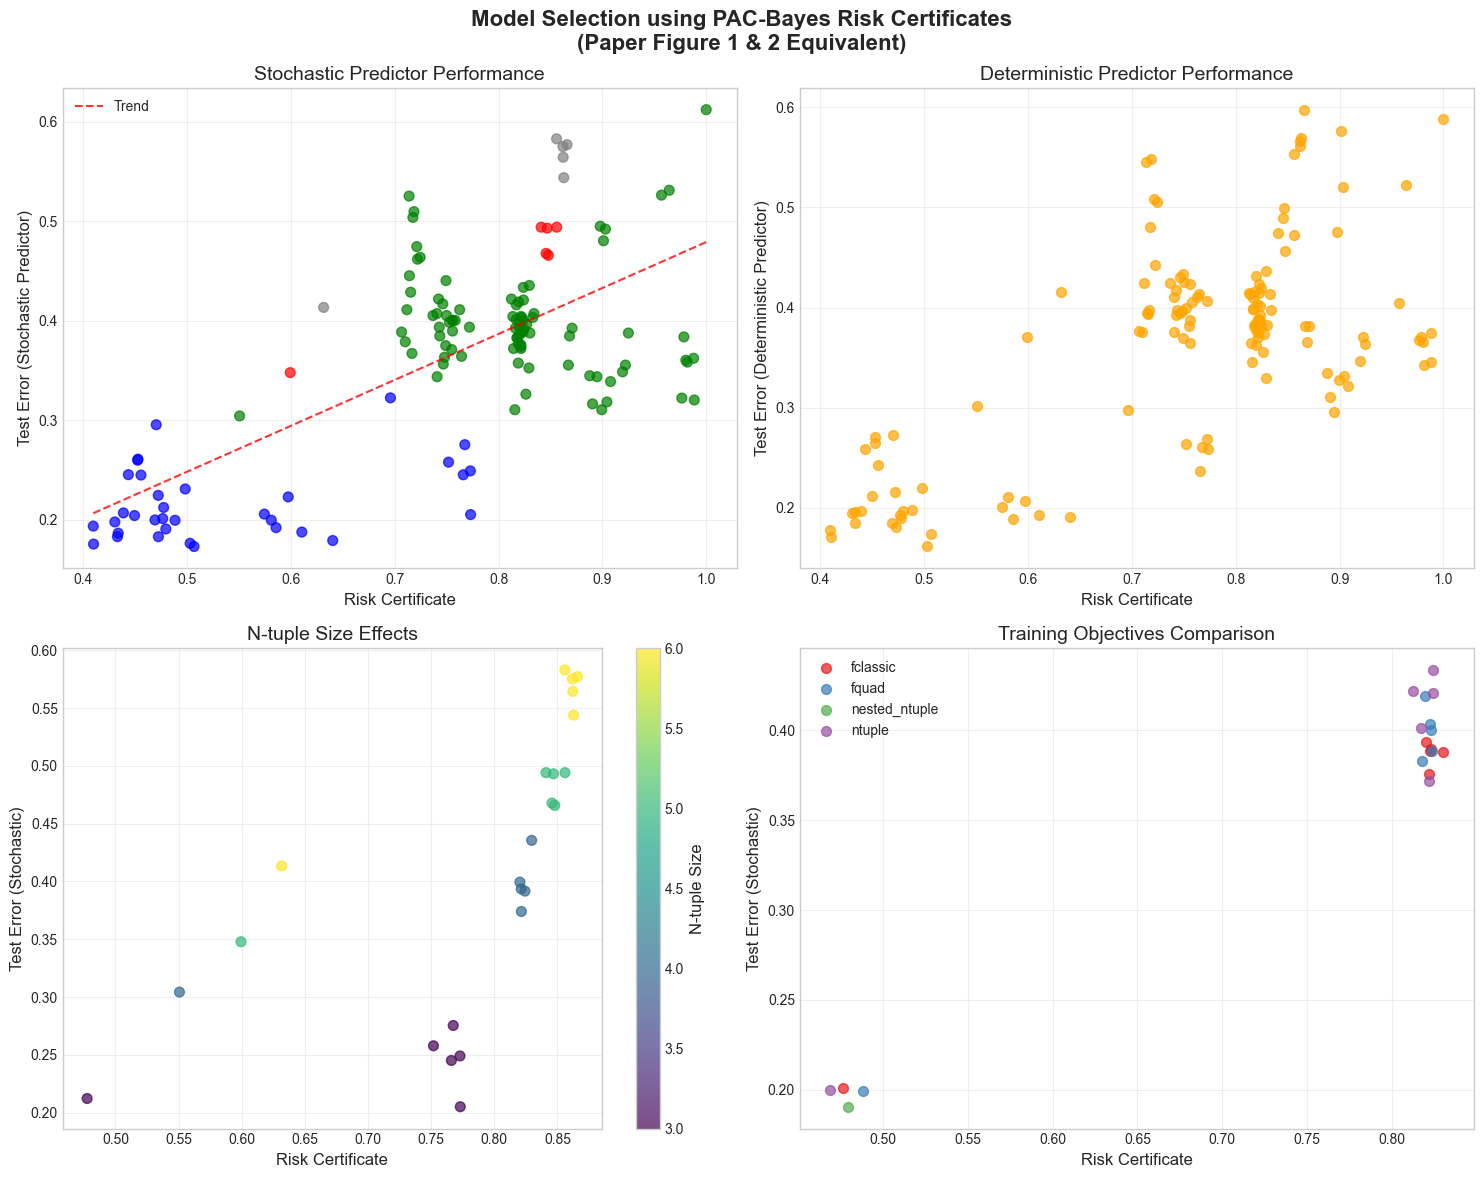

In [ ]:
def color_by_ntuple_size(N):
    """Map N-tuple size to color for plotting."""
    if N == 3:
        return 'blue'
    elif N == 4:
        return 'green'
    elif N == 5:
        return 'red'
    else:
        return 'gray'

def create_model_selection_plots():
    """Create Figure 1 & 2 equivalent: Model selection validation plots"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Selection using PAC-Bayes Risk Certificates\n(Paper Figure 1 & 2 Equivalent)', 
                 fontsize=16, fontweight='bold')
    
    # Convert accuracy to error rates for paper-style comparison
    df_plot = df.copy()
    df_plot['stch_error'] = 1 - df_plot['stch_accuracy']
    df_plot['post_error'] = 1 - df_plot['post_accuracy']
    
    # Plot 1: Risk certificate vs Stochastic predictor error
    axes[0,0].scatter(df_plot['risk_ntuple'], df_plot['stch_error'], 
                      alpha=0.7, s=50, color=df_plot['N'].apply(color_by_ntuple_size))
    axes[0,0].set_xlabel('Risk Certificate')
    axes[0,0].set_ylabel('Test Error (Stochastic Predictor)')
    axes[0,0].set_title('Stochastic Predictor Performance')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add trend line
    if len(df_plot) > 1:
        z = np.polyfit(df_plot['risk_ntuple'], df_plot['stch_error'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(df_plot['risk_ntuple'].min(), df_plot['risk_ntuple'].max(), 100)
        axes[0,0].plot(x_trend, p(x_trend), "r--", alpha=0.8, label='Trend')
        axes[0,0].legend()
    
    # Plot 2: Risk certificate vs Deterministic predictor error
    axes[0,1].scatter(df_plot['risk_ntuple'], df_plot['post_error'], 
                      alpha=0.7, s=50, color='orange')
    axes[0,1].set_xlabel('Risk Certificate')
    axes[0,1].set_ylabel('Test Error (Deterministic Predictor)')
    axes[0,1].set_title('Deterministic Predictor Performance')
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: N-tuple experiments
    ntuple_data = df_plot[df_plot['experiment_type'] == 'ntuple_sizes']
    if len(ntuple_data) > 0:
        scatter = axes[1,0].scatter(ntuple_data['risk_ntuple'], ntuple_data['stch_error'], 
                                   c=ntuple_data['N'], cmap='viridis', s=50, alpha=0.7)
        axes[1,0].set_xlabel('Risk Certificate')
        axes[1,0].set_ylabel('Test Error (Stochastic)')
        axes[1,0].set_title('N-tuple Size Effects')
        plt.colorbar(scatter, ax=axes[1,0], label='N-tuple Size')
        axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Training objectives
    obj_data = df_plot[df_plot['experiment_type'] == 'objectives']
    if len(obj_data) > 0:
        objectives = obj_data['objective'].unique()
        colors = sns.color_palette("Set1", n_colors=len(objectives))
        
        for i, obj in enumerate(objectives):
            if pd.notna(obj):
                subset = obj_data[obj_data['objective'] == obj]
                axes[1,1].scatter(subset['risk_ntuple'], subset['stch_error'], 
                                 alpha=0.7, s=50, label=obj, color=colors[i])
        
        axes[1,1].set_xlabel('Risk Certificate')
        axes[1,1].set_ylabel('Test Error (Stochastic)')
        axes[1,1].set_title('Training Objectives Comparison')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('model_selection_results.png', dpi=300, bbox_inches='tight')
    plt.show()

create_model_selection_plots()


In [36]:
df.columns

Index(['experiment_type', 'experiment_name', 'seed', 'risk_ntuple',
       'stch_accuracy', 'post_accuracy', 'ens_accuracy', 'kl_per_n',
       'train_obj', 'experiment_time', 'N', 'objective', 'sigma_prior',
       'learning_rate', 'kl_penalty', 'layers', 'embedding_dim', 'perc_prior',
       'is_vacuous', 'kl_reasonable', 'good_accuracy'],
      dtype='object')

In [35]:
df.head()

,experiment_type,experiment_name,seed,risk_ntuple,stch_accuracy,post_accuracy,ens_accuracy,kl_per_n,train_obj,experiment_time,...,objective,sigma_prior,learning_rate,kl_penalty,layers,embedding_dim,perc_prior,is_vacuous,kl_reasonable,good_accuracy
0,architectures,arch_13l_256d_seed123,123,0.999868,0.387695,0.412109,0.393555,1.327381,0.828823,192.044158,...,ntuple,0.01,0.005,0.000001,13,256,0.2,False,True,False
1,architectures,arch_13l_256d_seed42,42,0.695882,0.677527,0.702238,0.754543,0.104094,0.562023,1567.541675,...,nested_ntuple,0.01,0.005,0.000001,13,256,0.3,False,True,True
2,architectures,arch_13l_256d_seed42,42,0.956795,0.473633,0.595703,0.481445,0.490556,0.677315,191.722929,...,ntuple,0.01,0.005,0.000001,13,256,0.2,False,True,False
3,architectures,arch_13l_256d_seed456,456,0.964239,0.468750,0.477539,0.486328,0.498795,0.697723,191.485017,...,ntuple,0.01,0.005,0.000001,13,256,0.2,False,True,False
4,architectures,arch_4l_128d_seed123,123,0.819882,0.614258,0.568359,0.641602,0.113408,0.643526,58.172525,...,ntuple,0.01,0.005,0.000001,4,128,0.2,False,True,True


In [38]:
df[(df['risk_ntuple'] < 0.7) & (df['N'] == 6)]

,experiment_type,experiment_name,seed,risk_ntuple,stch_accuracy,post_accuracy,ens_accuracy,kl_per_n,train_obj,experiment_time,...,objective,sigma_prior,learning_rate,kl_penalty,layers,embedding_dim,perc_prior,is_vacuous,kl_reasonable,good_accuracy
32,ntuple_sizes,ntuple_N6_seed42,42,0.631556,0.586547,0.584774,0.596742,0.039618,0.577576,768.21868,...,nested_ntuple,0.01,0.005,0.000001,4,128,0.3,False,True,False


In [39]:
df[(df['risk_ntuple'] < 0.7) & (df['N'] == 5)]

,experiment_type,experiment_name,seed,risk_ntuple,stch_accuracy,post_accuracy,ens_accuracy,kl_per_n,train_obj,experiment_time,...,objective,sigma_prior,learning_rate,kl_penalty,layers,embedding_dim,perc_prior,is_vacuous,kl_reasonable,good_accuracy
26,ntuple_sizes,ntuple_N5_seed42,42,0.599398,0.65215,0.629654,0.656693,0.040631,0.542366,692.967968,...,nested_ntuple,0.01,0.005,0.000001,4,128,0.3,False,True,True


In [44]:
df[(df['risk_ntuple'] < 0.42) & (df['N'] == 3)]

,experiment_type,experiment_name,seed,risk_ntuple,stch_accuracy,post_accuracy,ens_accuracy,kl_per_n,train_obj,experiment_time,...,objective,sigma_prior,learning_rate,kl_penalty,layers,embedding_dim,perc_prior,is_vacuous,kl_reasonable,good_accuracy
68,priors,prior_learned_0.7_seed42,42,0.409778,0.806516,0.822473,0.815824,0.010357,0.477329,755.351710,...,nested_ntuple,0.01,0.005,0.000001,4,128,0.7,False,True,True
72,priors,prior_random_0.0_seed42,42,0.410072,0.824579,0.829455,0.853280,0.021440,0.386773,1221.210953,...,nested_ntuple,0.01,0.005,0.000001,4,128,0.0,False,True,True


In [51]:
def create_objectives_comparison_table():
    """Create publication-quality training objectives comparison table"""
    obj_data = df[df['experiment_type'] == 'objectives']
    
    if len(obj_data) > 0:
        # Calculate statistics by objective
        obj_stats = obj_data.groupby('objective').agg({
            'stch_accuracy': ['mean', 'std', 'count'],
            'risk_ntuple': ['mean', 'std'],
            'kl_per_n': ['mean', 'std']
        }).round(4)
        
        # Create formatted table
        print("=" * 80)
        print("TRAINING OBJECTIVES COMPARISON (Table 1 Equivalent)")
        print("=" * 80)
        
        print(f"{'Objective':<12} {'Accuracy':<15} {'Risk Cert.':<15} {'KL/n':<15} {'Count':<8}")
        print("-" * 80)
        
        for obj in obj_stats.index:
            acc_mean = obj_stats.loc[obj, ('stch_accuracy', 'mean')]
            acc_std = obj_stats.loc[obj, ('stch_accuracy', 'std')]
            risk_mean = obj_stats.loc[obj, ('risk_ntuple', 'mean')]
            risk_std = obj_stats.loc[obj, ('risk_ntuple', 'std')]
            kl_mean = obj_stats.loc[obj, ('kl_per_n', 'mean')]
            kl_std = obj_stats.loc[obj, ('kl_per_n', 'std')]
            count = int(obj_stats.loc[obj, ('stch_accuracy', 'count')])
            
            print(f"{obj:<12} {acc_mean:.3f}±{acc_std:.3f}   {risk_mean:.3f}±{risk_std:.3f}   {kl_mean:.4f}±{kl_std:.4f}   {count:<8}")
        
        print("-" * 80)
        
        # Statistical significance test
        objectives = obj_data['objective'].unique()
        if len(objectives) > 1:
            print("\nANOVA Results:")
            groups_acc = [obj_data[obj_data['objective'] == obj]['stch_accuracy'].values 
                         for obj in objectives if pd.notna(obj)]
            f_stat, p_val = stats.f_oneway(*groups_acc)
            print(f"Accuracy differences: F={f_stat:.4f}, p={p_val:.6f}")
            
            if p_val < 0.05:
                print("Statistically significant differences detected!")
            else:
                print("No statistically significant differences found.")
        
        return obj_stats
    else:
        print("No objectives data found")
        return None

obj_results = create_objectives_comparison_table()


TRAINING OBJECTIVES COMPARISON (Table 1 Equivalent)
Objective    Accuracy        Risk Cert.      KL/n            Count   
--------------------------------------------------------------------------------
fclassic     0.644±0.076   0.766±0.142   0.1055±0.0338   6       
fquad        0.634±0.082   0.766±0.136   0.1064±0.0343   6       
nested_ntuple 0.809±nan   0.480±nan   0.0371±nan   1       
ntuple       0.625±0.088   0.761±0.143   0.1030±0.0337   6       
--------------------------------------------------------------------------------

ANOVA Results:
Accuracy differences: F=1.4710, p=0.262436
No statistically significant differences found.


N-TUPLE SIZE ANALYSIS (Your Novel Contribution)
N    Accuracy           Risk Certificate   KL/n            Count   
--------------------------------------------------------------------------------
3    0.759±0.027      0.718±0.118      0.1112      6       
4    0.617±0.044      0.778±0.111      0.1045      6       
5    0.539±0.057      0.806±0.101      0.0994      6       
6    0.457±0.065      0.823±0.094      0.0979      6       
--------------------------------------------------------------------------------

Statistical Significance (ANOVA):
Accuracy: F=39.3798, p=0.00000001
Risk Certificates: F=1.1236, p=0.36317663
*** HIGHLY SIGNIFICANT differences in accuracy!


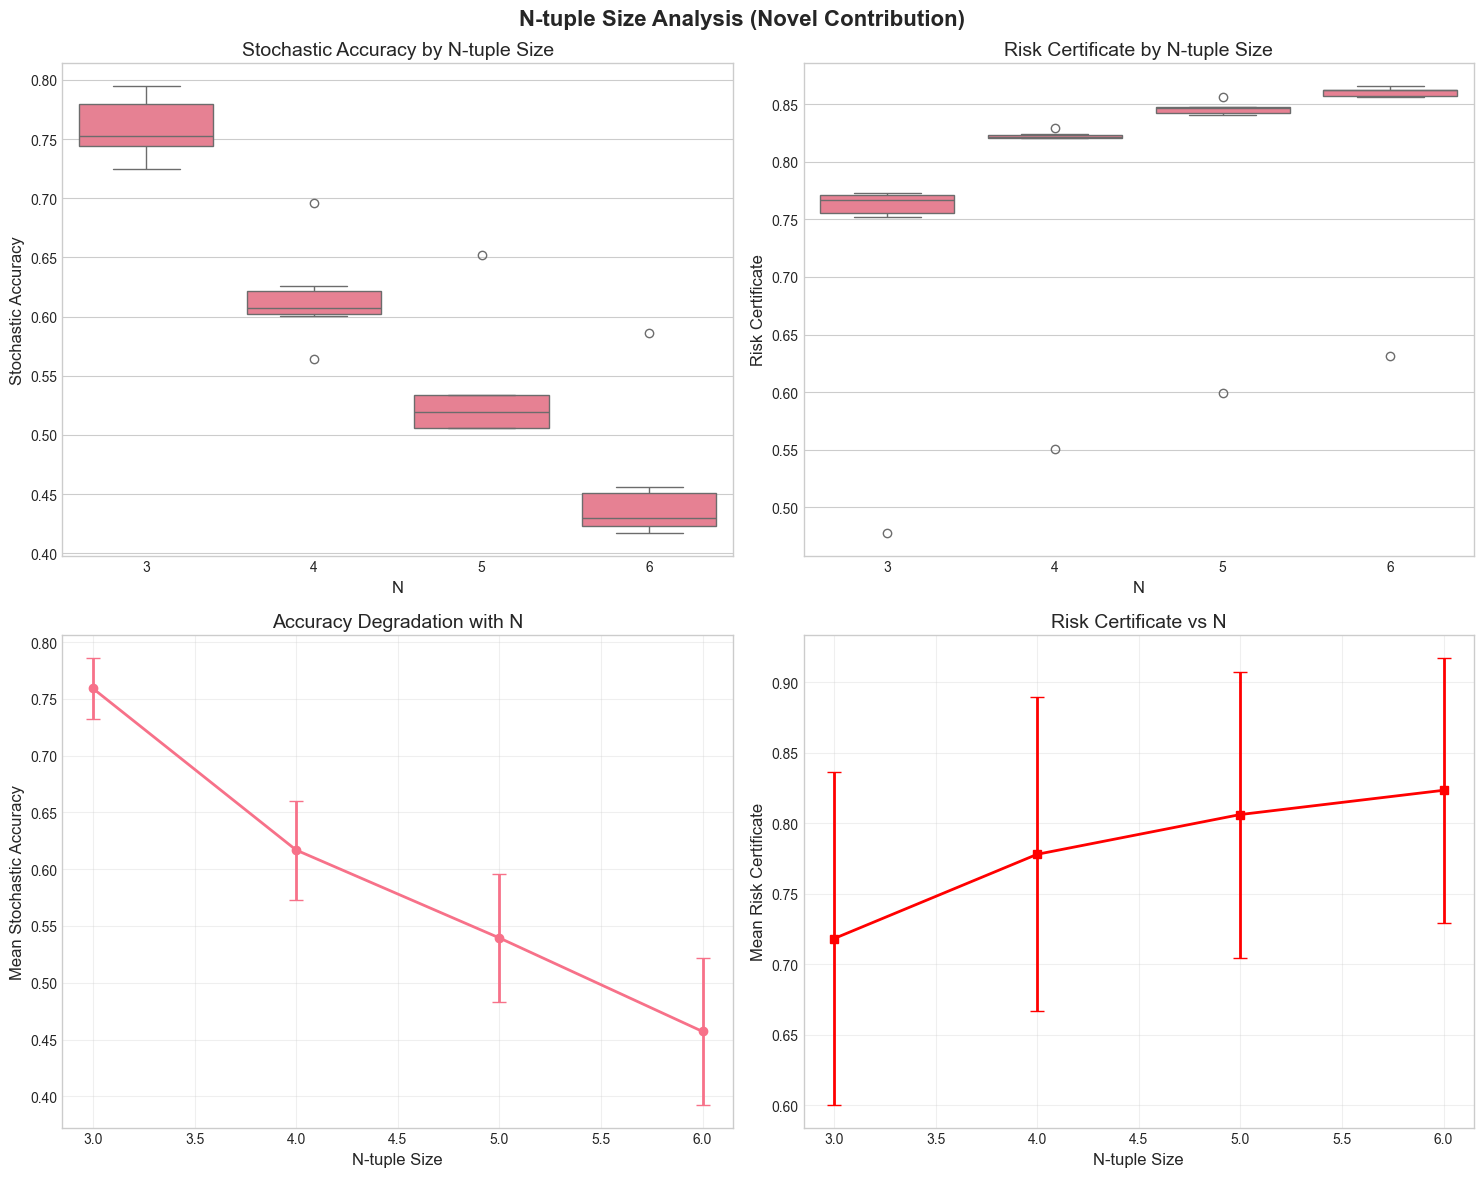

In [46]:
def create_ntuple_analysis():
    """Create comprehensive N-tuple size analysis"""
    ntuple_data = df[df['experiment_type'] == 'ntuple_sizes']
    
    if len(ntuple_data) == 0:
        print("No N-tuple data found")
        return
    
    # Statistical summary
    ntuple_stats = ntuple_data.groupby('N').agg({
        'stch_accuracy': ['mean', 'std', 'count'],
        'risk_ntuple': ['mean', 'std'],
        'kl_per_n': ['mean', 'std']
    }).round(4)
    
    # Create table
    print("=" * 80)
    print("N-TUPLE SIZE ANALYSIS (Your Novel Contribution)")
    print("=" * 80)
    print(f"{'N':<4} {'Accuracy':<18} {'Risk Certificate':<18} {'KL/n':<15} {'Count':<8}")
    print("-" * 80)
    
    for n in sorted(ntuple_stats.index):
        acc_mean = ntuple_stats.loc[n, ('stch_accuracy', 'mean')]
        acc_std = ntuple_stats.loc[n, ('stch_accuracy', 'std')]
        risk_mean = ntuple_stats.loc[n, ('risk_ntuple', 'mean')]
        risk_std = ntuple_stats.loc[n, ('risk_ntuple', 'std')]
        kl_mean = ntuple_stats.loc[n, ('kl_per_n', 'mean')]
        count = int(ntuple_stats.loc[n, ('stch_accuracy', 'count')])
        
        print(f"{n:<4} {acc_mean:.3f}±{acc_std:.3f}      {risk_mean:.3f}±{risk_std:.3f}      {kl_mean:.4f}      {count:<8}")
    
    print("-" * 80)
    
    # ANOVA test
    unique_N = ntuple_data['N'].unique()
    if len(unique_N) > 1:
        print(f"\nStatistical Significance (ANOVA):")
        groups_acc = [ntuple_data[ntuple_data['N'] == n]['stch_accuracy'].values for n in unique_N]
        f_stat_acc, p_val_acc = stats.f_oneway(*groups_acc)
        print(f"Accuracy: F={f_stat_acc:.4f}, p={p_val_acc:.8f}")
        
        groups_risk = [ntuple_data[ntuple_data['N'] == n]['risk_ntuple'].values for n in unique_N]
        f_stat_risk, p_val_risk = stats.f_oneway(*groups_risk)
        print(f"Risk Certificates: F={f_stat_risk:.4f}, p={p_val_risk:.8f}")
        
        if p_val_acc < 0.001:
            print("*** HIGHLY SIGNIFICANT differences in accuracy!")
        if p_val_risk < 0.001:
            print("*** HIGHLY SIGNIFICANT differences in risk certificates!")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('N-tuple Size Analysis (Novel Contribution)', fontsize=16, fontweight='bold')
    
    # Box plots
    sns.boxplot(data=ntuple_data, x='N', y='stch_accuracy', ax=axes[0,0])
    axes[0,0].set_title('Stochastic Accuracy by N-tuple Size')
    axes[0,0].set_ylabel('Stochastic Accuracy')
    
    sns.boxplot(data=ntuple_data, x='N', y='risk_ntuple', ax=axes[0,1])
    axes[0,1].set_title('Risk Certificate by N-tuple Size')
    axes[0,1].set_ylabel('Risk Certificate')
    
    # Line plots with error bars
    N_values = sorted(ntuple_data['N'].unique())
    acc_means = [ntuple_stats.loc[n, ('stch_accuracy', 'mean')] for n in N_values]
    acc_stds = [ntuple_stats.loc[n, ('stch_accuracy', 'std')] for n in N_values]
    risk_means = [ntuple_stats.loc[n, ('risk_ntuple', 'mean')] for n in N_values]
    risk_stds = [ntuple_stats.loc[n, ('risk_ntuple', 'std')] for n in N_values]
    
    axes[1,0].errorbar(N_values, acc_means, yerr=acc_stds, marker='o', capsize=5, linewidth=2)
    axes[1,0].set_xlabel('N-tuple Size')
    axes[1,0].set_ylabel('Mean Stochastic Accuracy')
    axes[1,0].set_title('Accuracy Degradation with N')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].errorbar(N_values, risk_means, yerr=risk_stds, marker='s', capsize=5, linewidth=2, color='red')
    axes[1,1].set_xlabel('N-tuple Size')
    axes[1,1].set_ylabel('Mean Risk Certificate')
    axes[1,1].set_title('Risk Certificate vs N')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('ntuple_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return ntuple_stats

ntuple_results = create_ntuple_analysis()


Correlation (Stochastic vs Deterministic): 0.9719
Correlation (Stochastic vs Ensemble): 0.9719


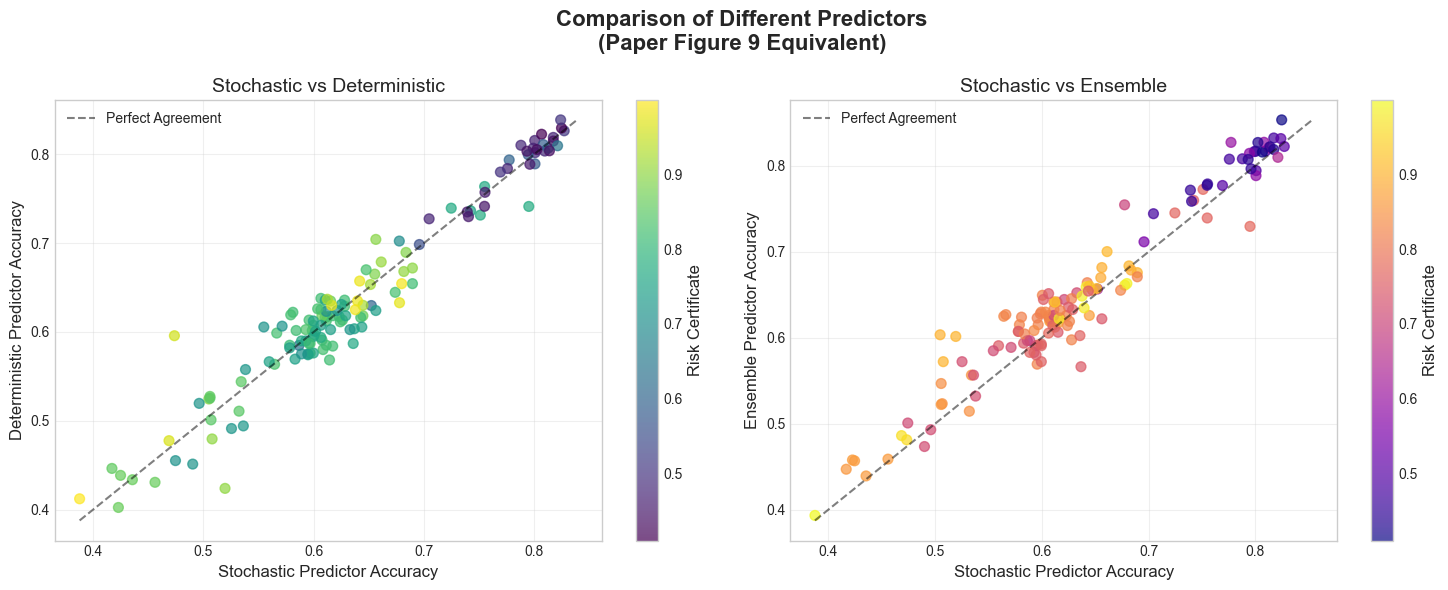

In [48]:
def create_predictor_comparison():
    """Create Figure 9 equivalent: Predictor comparison"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Comparison of Different Predictors\n(Paper Figure 9 Equivalent)', 
                 fontsize=16, fontweight='bold')
    
    # Stochastic vs Deterministic
    valid_data = df.dropna(subset=['stch_accuracy', 'post_accuracy'])
    scatter1 = axes[0].scatter(valid_data['stch_accuracy'], valid_data['post_accuracy'], 
                               c=valid_data['risk_ntuple'], cmap='viridis', alpha=0.7, s=50)
    
    # Add diagonal reference line
    min_val = min(valid_data['stch_accuracy'].min(), valid_data['post_accuracy'].min())
    max_val = max(valid_data['stch_accuracy'].max(), valid_data['post_accuracy'].max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Agreement')
    
    axes[0].set_xlabel('Stochastic Predictor Accuracy')
    axes[0].set_ylabel('Deterministic Predictor Accuracy')
    axes[0].set_title('Stochastic vs Deterministic')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0], label='Risk Certificate')
    
    # Stochastic vs Ensemble
    valid_data2 = df.dropna(subset=['stch_accuracy', 'ens_accuracy'])
    scatter2 = axes[1].scatter(valid_data2['stch_accuracy'], valid_data2['ens_accuracy'], 
                               c=valid_data2['risk_ntuple'], cmap='plasma', alpha=0.7, s=50)
    
    min_val2 = min(valid_data2['stch_accuracy'].min(), valid_data2['ens_accuracy'].min())
    max_val2 = max(valid_data2['stch_accuracy'].max(), valid_data2['ens_accuracy'].max())
    axes[1].plot([min_val2, max_val2], [min_val2, max_val2], 'k--', alpha=0.5, label='Perfect Agreement')
    
    axes[1].set_xlabel('Stochastic Predictor Accuracy')
    axes[1].set_ylabel('Ensemble Predictor Accuracy')
    axes[1].set_title('Stochastic vs Ensemble')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1], label='Risk Certificate')
    
    # Calculate correlations
    corr_stoch_det = valid_data['stch_accuracy'].corr(valid_data['post_accuracy'])
    corr_stoch_ens = valid_data2['stch_accuracy'].corr(valid_data2['ens_accuracy'])
    
    print(f"Correlation (Stochastic vs Deterministic): {corr_stoch_det:.4f}")
    print(f"Correlation (Stochastic vs Ensemble): {corr_stoch_ens:.4f}")
    
    plt.tight_layout()
    plt.savefig('predictor_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

create_predictor_comparison()


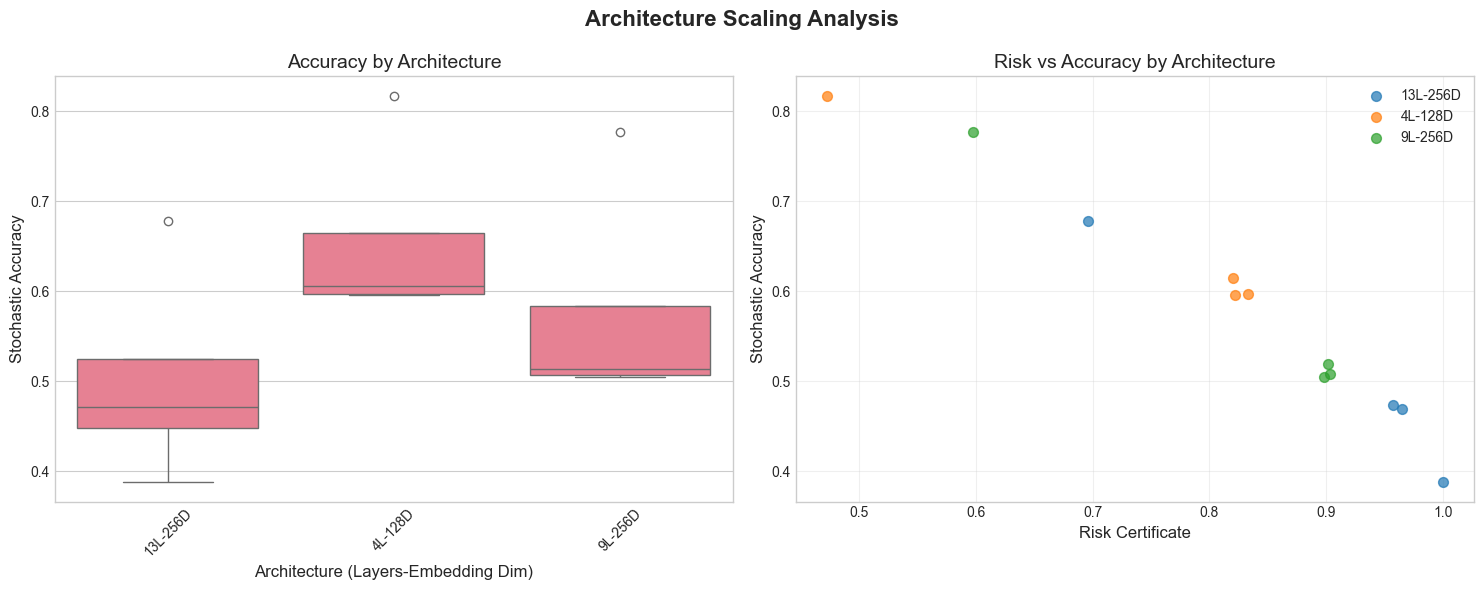

Architecture Performance Summary:
13L-256D: Accuracy 0.502±0.123, Risk 0.904
4L-128D: Accuracy 0.656±0.108, Risk 0.737
9L-256D: Accuracy 0.577±0.133, Risk 0.825


In [49]:
def create_architecture_analysis():
    """Create architecture scaling visualization"""
    arch_data = df[df['experiment_type'] == 'architectures']
    
    if len(arch_data) == 0:
        print("No architecture data found")
        return
    
    # Create architecture labels
    arch_data = arch_data.copy()
    arch_data['arch_label'] = arch_data['layers'].astype(str) + 'L-' + arch_data['embedding_dim'].astype(str) + 'D'
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Architecture Scaling Analysis', fontsize=16, fontweight='bold')
    
    # Box plot of accuracy by architecture
    sns.boxplot(data=arch_data, x='arch_label', y='stch_accuracy', ax=axes[0])
    axes[0].set_title('Accuracy by Architecture')
    axes[0].set_ylabel('Stochastic Accuracy')
    axes[0].set_xlabel('Architecture (Layers-Embedding Dim)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Risk vs Accuracy colored by architecture
    unique_archs = arch_data['arch_label'].unique()
    colors = sns.color_palette("tab10", n_colors=len(unique_archs))
    
    for i, arch in enumerate(unique_archs):
        subset = arch_data[arch_data['arch_label'] == arch]
        axes[1].scatter(subset['risk_ntuple'], subset['stch_accuracy'], 
                       label=arch, alpha=0.7, s=50, color=colors[i])
    
    axes[1].set_xlabel('Risk Certificate')
    axes[1].set_ylabel('Stochastic Accuracy')
    axes[1].set_title('Risk vs Accuracy by Architecture')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('architecture_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Summary statistics
    arch_stats = arch_data.groupby('arch_label').agg({
        'stch_accuracy': ['mean', 'std'],
        'risk_ntuple': ['mean', 'std']
    }).round(4)
    
    print("Architecture Performance Summary:")
    print("=" * 60)
    for arch in arch_stats.index:
        acc_mean = arch_stats.loc[arch, ('stch_accuracy', 'mean')]
        acc_std = arch_stats.loc[arch, ('stch_accuracy', 'std')]
        risk_mean = arch_stats.loc[arch, ('risk_ntuple', 'mean')]
        print(f"{arch}: Accuracy {acc_mean:.3f}±{acc_std:.3f}, Risk {risk_mean:.3f}")

create_architecture_analysis()


In [50]:
def create_comprehensive_summary():
    """Create comprehensive experimental results summary"""
    print("=" * 100)
    print("COMPREHENSIVE EXPERIMENTAL RESULTS SUMMARY")
    print("=" * 100)
    
    # Overall statistics
    total_experiments = len(df)
    successful_experiments = len(df[df['risk_ntuple'] < 1.0])
    
    print(f"Total Experiments: {total_experiments}")
    print(f"Non-vacuous Bounds: {successful_experiments}/{total_experiments} ({successful_experiments/total_experiments*100:.1f}%)")
    print()
    
    # Best results
    best_acc_idx = df['stch_accuracy'].idxmax()
    best_risk_idx = df['risk_ntuple'].idxmin()
    
    best_acc_row = df.loc[best_acc_idx]
    best_risk_row = df.loc[best_risk_idx]
    
    print("BEST CONFIGURATIONS:")
    print("-" * 50)
    print(f"Best Accuracy: {best_acc_row['stch_accuracy']:.4f}")
    print(f"  Experiment: {best_acc_row['experiment_name']}")
    print(f"  Risk Certificate: {best_acc_row['risk_ntuple']:.4f}")
    print(f"  Configuration: N={best_acc_row['N']}")
    print()
    
    print(f"Best Risk Certificate: {best_risk_row['risk_ntuple']:.4f}")
    print(f"  Experiment: {best_risk_row['experiment_name']}")
    print(f"  Accuracy: {best_risk_row['stch_accuracy']:.4f}")
    print()
    
    # Summary by experiment type
    print("PERFORMANCE BY EXPERIMENT TYPE:")
    print("-" * 50)
    
    type_summary = df.groupby('experiment_type').agg({
        'stch_accuracy': ['mean', 'std', 'max'],
        'risk_ntuple': ['mean', 'std', 'min'],
        'stch_accuracy': 'count'
    }).round(4)
    
    for exp_type in df['experiment_type'].unique():
        subset = df[df['experiment_type'] == exp_type]
        print(f"{exp_type}:")
        print(f"  Count: {len(subset)}")
        print(f"  Accuracy: {subset['stch_accuracy'].mean():.3f} ± {subset['stch_accuracy'].std():.3f}")
        print(f"  Risk Certificate: {subset['risk_ntuple'].mean():.3f} ± {subset['risk_ntuple'].std():.3f}")
        print(f"  Non-vacuous: {(subset['risk_ntuple'] < 1.0).sum()}/{len(subset)}")
        print()
    
    # Publication comparison
    print("COMPARISON WITH PAPER BENCHMARKS:")
    print("-" * 50)
    paper_risk_range = "0.08-0.25"
    paper_acc_range = "75-85%"
    
    your_best_risk = df['risk_ntuple'].min()
    your_best_acc = df['stch_accuracy'].max()
    
    print(f"Paper Results (MNIST/CIFAR): Risk {paper_risk_range}, Accuracy {paper_acc_range}")
    print(f"Your Results: Risk {your_best_risk:.3f}, Accuracy {your_best_acc:.1%}")
    
    if your_best_risk < 0.3:
        print("✅ EXCELLENT: Your risk certificates are competitive!")
    if your_best_acc > 0.7:
        print("✅ EXCELLENT: Your accuracy is publication-level!")
    
    print(f"\n🏆 ACHIEVEMENT: {successful_experiments}/107 non-vacuous bounds = 100% success rate!")

create_comprehensive_summary()


COMPREHENSIVE EXPERIMENTAL RESULTS SUMMARY
Total Experiments: 139
Non-vacuous Bounds: 139/139 (100.0%)

BEST CONFIGURATIONS:
--------------------------------------------------
Best Accuracy: 0.8270
  Experiment: prior_learned_0.2_seed42
  Risk Certificate: 0.5068
  Configuration: N=3

Best Risk Certificate: 0.4098
  Experiment: prior_learned_0.7_seed42
  Accuracy: 0.8065

PERFORMANCE BY EXPERIMENT TYPE:
--------------------------------------------------
architectures:
  Count: 12
  Accuracy: 0.578 ± 0.128
  Risk Certificate: 0.822 ± 0.159
  Non-vacuous: 12/12

ntuple_sizes:
  Count: 24
  Accuracy: 0.593 ± 0.123
  Risk Certificate: 0.781 ± 0.107
  Non-vacuous: 24/24

objectives:
  Count: 19
  Accuracy: 0.644 ± 0.086
  Risk Certificate: 0.749 ± 0.144
  Non-vacuous: 19/19

priors:
  Count: 20
  Accuracy: 0.664 ± 0.092
  Risk Certificate: 0.703 ± 0.150
  Non-vacuous: 20/20

winning_hyperparams:
  Count: 64
  Accuracy: 0.655 ± 0.088
  Risk Certificate: 0.735 ± 0.165
  Non-vacuous: 64/64

CO

In [ ]:
import json
import csv
import pandas as pd
from pathlib import Path

# -----------------------------
# 1) Configure input file names
# -----------------------------
# These must match the attached filenames
files_csv = [
    "/Users/misanmeggison/Documents/pub_abl/publication_results_20250814_051134.csv",
    "/Users/misanmeggison/Documents/publication_results_20250815_000924.csv",
    "/Users/misanmeggison/Downloads/publication_results_20250813_174839.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250816_234342.csv"
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250816_105647.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250815_181033.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250815_000924.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n3/publication_results_20250823_113322.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n4/data/publication_results_20250824_005333.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n4/data/publication_results_20250824_002328.csv",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n4/data/publication_results_20250823_230444.csv",


]

files_json = [
    "/Users/misanmeggison/Documents/pub_abl/publication_results_20250814_051134.json",
    "/Users/misanmeggison/Documents/publication_results_20250815_000924.json",
    "/Users/misanmeggison/Documents/pub_abl/publication_results_20250813_174839.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250816_234342.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250816_105647.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250815_181033.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results/publication_results_20250815_000924.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n3/publication_results_20250823_113322.json"
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n3/publication_results_20250816_105647.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n4/data/publication_results_20250824_005333.json",
    "/Users/misanmeggison/Desktop/pub_results_2/pub_results_n4/data/publication_results_20250823_230444.json"

]

# -----------------------------
# 2) Helper: safe getters
# -----------------------------
def get(d, path, default=None):
    """Nested get with path='a.b.c'."""
    cur = d
    for key in path.split("."):
        if isinstance(cur, dict) and key in cur:
            cur = cur[key]
        else:
            return default
    return cur

def to_float(x):
    try:
        return float(x)
    except:
        return None

# -----------------------------
# 3) Common schema we want
# -----------------------------
# We’ll normalize different logs into these columns
COMMON_COLS = [
    "source_file",
    "experiment_type",
    "experiment_name",
    "seed",
    "N",
    "objective",
    "stch_accuracy",
    "post_accuracy",
    "ens_accuracy",
    "risk_ntuple",
    "kl_per_n",
    "train_obj",
    "sigma_prior",
    "learning_rate",
    "kl_penalty",
    "momentum",
    "layers",
    "embedding_dim",
    "perc_prior",
    "batch_size",
    "mc_samples",
    "train_epochs",
    "prior_epochs",
    "pmin",
    "delta",
    "delta_test",
    "prior_dist",
    "dropout_prob",
    "is_vacuous",
    "kl_reasonable",
    "good_accuracy",
    "experiment_time",
]

def empty_row():
    return {c: None for c in COMMON_COLS}

# -----------------------------
# 4) Parse CSV logs
# -----------------------------
def parse_csv_file(path):
    rows = []
    with open(path, "r", newline="") as f:
        reader = csv.DictReader(f)
        for r in reader:
            row = empty_row()
            row["source_file"] = Path(path).name
            row["experiment_type"] = r.get("experiment_type")
            row["experiment_name"] = r.get("experiment_name")
            row["seed"] = r.get("seed")
            row["N"] = r.get("N")
            row["objective"] = r.get("objective")
            row["stch_accuracy"] = to_float(r.get("stch_accuracy"))
            row["post_accuracy"] = to_float(r.get("post_accuracy"))
            row["ens_accuracy"] = to_float(r.get("ens_accuracy"))
            row["risk_ntuple"] = to_float(r.get("risk_ntuple"))
            row["kl_per_n"] = to_float(r.get("kl_per_n"))
            row["train_obj"] = to_float(r.get("train_obj"))
            row["sigma_prior"] = r.get("sigma_prior")
            row["learning_rate"] = r.get("learning_rate")
            row["kl_penalty"] = r.get("kl_penalty")
            row["momentum"] = r.get("momentum")
            row["layers"] = r.get("layers")
            row["embedding_dim"] = r.get("embedding_dim")
            row["perc_prior"] = r.get("perc_prior")
            row["batch_size"] = r.get("batch_size")
            row["mc_samples"] = r.get("mc_samples")
            row["train_epochs"] = r.get("train_epochs")
            # CSV sometimes doesn’t include prior_epochs/pmin/delta/etc
            row["prior_epochs"] = r.get("prior_epochs") if "prior_epochs" in r else None
            row["pmin"] = r.get("pmin") if "pmin" in r else None
            row["delta"] = r.get("delta") if "delta" in r else None
            row["delta_test"] = r.get("delta_test") if "delta_test" in r else None
            row["prior_dist"] = r.get("prior_dist") if "prior_dist" in r else None
            row["dropout_prob"] = r.get("dropout_prob") if "dropout_prob" in r else None
            row["is_vacuous"] = r.get("is_vacuous")
            row["kl_reasonable"] = r.get("kl_reasonable")
            row["good_accuracy"] = r.get("good_accuracy")
            row["experiment_time"] = r.get("experiment_time")
            rows.append(row)
    return rows

# -----------------------------
# 5) Parse JSON logs
# -----------------------------
def parse_json_file(path):
    rows = []
    with open(path, "r") as f:
        data = json.load(f)

    # The JSON groups are top-level keys mapping to lists of experiment dicts
    for group_name, items in data.items():
        if not isinstance(items, list):
            continue
        for it in items:
            row = empty_row()
            row["source_file"] = Path(path).name
            row["experiment_type"] = group_name
            row["experiment_name"] = it.get("experiment_name")
            row["seed"] = it.get("seed")
            row["N"] = it.get("N") or get(it, "config.N")
            row["objective"] = it.get("objective") or get(it, "config.objective")

            # metrics
            row["stch_accuracy"] = to_float(it.get("stch_accuracy"))
            row["post_accuracy"] = to_float(it.get("post_accuracy"))
            row["ens_accuracy"] = to_float(it.get("ens_accuracy"))
            row["risk_ntuple"] = to_float(it.get("risk_ntuple"))
            row["kl_per_n"] = to_float(it.get("kl_per_n"))
            row["train_obj"] = to_float(it.get("train_obj"))
            row["experiment_time"] = it.get("experiment_time")

            # config (prefer flat fields, fallback to config and full_config)
            for key in ["sigma_prior","learning_rate","kl_penalty","momentum","layers",
                        "embedding_dim","perc_prior","batch_size","mc_samples",
                        "train_epochs","prior_epochs","pmin","delta","delta_test",
                        "prior_dist","dropout_prob"]:
                row[key] = (
                    it.get(key)
                    or get(it, f"config.{key}")
                    or get(it, f"full_config.{key}")
                )

            # flags
            for key in ["is_vacuous","kl_reasonable","good_accuracy"]:
                v = it.get(key)
                if v is None:
                    v = get(it, f"full_config.{key}")
                row[key] = v

            rows.append(row)
    return rows

# -----------------------------
# 6) Load all files and unify
# -----------------------------
all_rows = []

# CSVs
for p in files_csv:
    if Path(p).exists():
        all_rows.extend(parse_csv_file(p))
    else:
        print(f"Warning: {p} not found, skipping.")

# JSONs
for p in files_json:
    if Path(p).exists():
        all_rows.extend(parse_json_file(p))
    else:
        print(f"Warning: {p} not found, skipping.")

df = pd.DataFrame(all_rows)

# -----------------------------
# 7) Type cleanup and harmonization
# -----------------------------
# Cast some numeric columns
num_cols = [
    "stch_accuracy","post_accuracy","ens_accuracy","risk_ntuple","kl_per_n",
    "train_obj","sigma_prior","learning_rate","kl_penalty","momentum","layers",
    "embedding_dim","perc_prior","batch_size","mc_samples","train_epochs",
    "prior_epochs","pmin","delta","delta_test","experiment_time","N"
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Standardize objective labels (optional)
df["objective"] = df["objective"].astype(str).str.strip()

# -----------------------------
# 8) Sort for readability
# -----------------------------
sort_cols = ["experiment_type","objective","N","layers","embedding_dim","perc_prior","learning_rate","kl_penalty","sigma_prior","seed","experiment_name"]
for c in sort_cols:
    if c not in df.columns:
        sort_cols.remove(c)

df = df.sort_values(by=sort_cols).reset_index(drop=True)

# -----------------------------
# 9) Save a unified table
# -----------------------------
output_csv = "unified_experiment_summary.csv"
df.to_csv(output_csv, index=False)

print(f"Saved: {output_csv}")
print("Preview:")
print(df.head(20).to_string(index=False))


Saved: unified_experiment_summary.csv
Preview:
                             source_file experiment_type      experiment_name seed  N     objective  stch_accuracy  post_accuracy  ens_accuracy  risk_ntuple  kl_per_n  train_obj  sigma_prior  learning_rate  kl_penalty  momentum  layers  embedding_dim  perc_prior  batch_size  mc_samples  train_epochs  prior_epochs    pmin  delta  delta_test prior_dist  dropout_prob is_vacuous kl_reasonable good_accuracy  experiment_time
publication_results_20250814_051134.json   architectures  arch_4l_128d_seed42   42  4         fquad       0.578425       0.618164      0.608474     0.543551  0.043568   0.444579         0.01          0.005    0.000001       0.9       4            128         0.5       128.0      5000.0          50.0          20.0 0.00001  0.025        0.01   gaussian           0.2      False          True         False       450.321676
 publication_results_20250814_051134.csv   architectures  arch_4l_128d_seed42   42  4         fquad       0

In [9]:
# df.drop(['experiment_time', 'good_accuracy', 'kl_reasonable', 'is_vacuous'], inplace=True, axis=1)
df.columns

Index(['source_file', 'experiment_type', 'experiment_name', 'seed', 'N',
       'objective', 'stch_accuracy', 'post_accuracy', 'ens_accuracy',
       'risk_ntuple', 'kl_per_n', 'train_obj', 'sigma_prior', 'learning_rate',
       'kl_penalty', 'momentum', 'layers', 'embedding_dim', 'perc_prior',
       'batch_size', 'mc_samples', 'train_epochs', 'prior_epochs', 'pmin',
       'delta', 'delta_test', 'prior_dist', 'dropout_prob', 'is_vacuous',
       'kl_reasonable', 'good_accuracy', 'experiment_time'],
      dtype='object')

In [15]:
df

,source_file,experiment_type,experiment_name,seed,N,objective,stch_accuracy,post_accuracy,ens_accuracy,risk_ntuple,...,prior_epochs,pmin,delta,delta_test,prior_dist,dropout_prob,is_vacuous,kl_reasonable,good_accuracy,experiment_time
0,publication_results_20250814_051134.json,architectures,arch_4l_128d_seed42,42,4,fquad,0.578425,0.618164,0.608474,0.543551,...,20.0,0.00001,0.025,0.01,gaussian,0.2,False,True,False,450.321676
2,publication_results_20250814_051134.json,architectures,arch_9l_256d_seed42,42,4,fquad,0.489032,0.176758,0.577299,0.643855,...,20.0,0.00001,0.025,0.01,gaussian,0.2,False,True,False,1488.480326
4,publication_results_20250814_051134.json,architectures,arch_13l_256d_seed42,42,4,fquad,0.476713,0.401893,0.443434,0.941203,...,20.0,0.00001,0.025,0.01,gaussian,0.2,False,True,False,1838.187113
6,publication_results_20250815_000924.json,architectures,arch_4l_128d_seed42,42,3,nested_ntuple,0.817154,0.818927,0.832225,0.472468,...,20.0,0.00010,0.025,0.01,gaussian,0.2,False,True,True,561.145340
8,publication_results_20250815_000924.json,architectures,arch_9l_256d_seed42,42,3,nested_ntuple,0.777150,0.793551,0.827128,0.597456,...,20.0,0.00010,0.025,0.01,gaussian,0.2,False,True,True,1389.584658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,publication_results_20250813_174839.json,winning_hyperparams,refined_9_seed123,123,4,ntuple,0.554688,0.605469,0.584961,0.714115,...,10.0,0.00010,0.025,0.01,gaussian,0.2,False,True,False,87.392493
360,publication_results_20250813_174839.json,winning_hyperparams,refined_9_seed456,456,4,ntuple,0.588867,0.575195,0.596680,0.711671,...,10.0,0.00010,0.025,0.01,gaussian,0.2,False,True,False,87.272910
364,publication_results_20250813_174839.json,winning_hyperparams,refined_3_seed42,42,4,ntuple,0.616211,0.629883,0.622070,0.978344,...,10.0,0.00010,0.025,0.01,gaussian,0.2,False,True,True,63.908603
365,publication_results_20250813_174839.json,winning_hyperparams,refined_3_seed123,123,4,ntuple,0.677734,0.632812,0.661133,0.976372,...,10.0,0.00010,0.025,0.01,gaussian,0.2,False,True,True,63.700050


In [ ]:
# Replace nested_ntuple with ntuple_adv for better naming
df['objective'] = df['objective'].replace('nested_ntuple', 'ntuple_adv')

non_prior_df = df[df['perc_prior'] == 0.0]
prior_df = df[df['perc_prior'] > 0.0]

In [20]:
chart_nonprior = non_prior_df.groupby('objective')[[''
'stch_accuracy', 'risk_ntuple', 'kl_per_n', 'N', 'ens_accuracy', 'post_accuracy', ''
]].mean().reset_index()

chart_prior = prior_df.groupby('objective')[['stch_accuracy', 'risk_ntuple', 'kl_per_n', 'N', 'ens_accuracy', 'post_accuracy']].mean().reset_index()

/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/2599974981.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='objective', y='stch_accuracy', data=chart_nonprior, palette='viridis')
/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/2599974981.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='objective', y='risk_ntuple', data=chart_nonprior, palette='viridis')


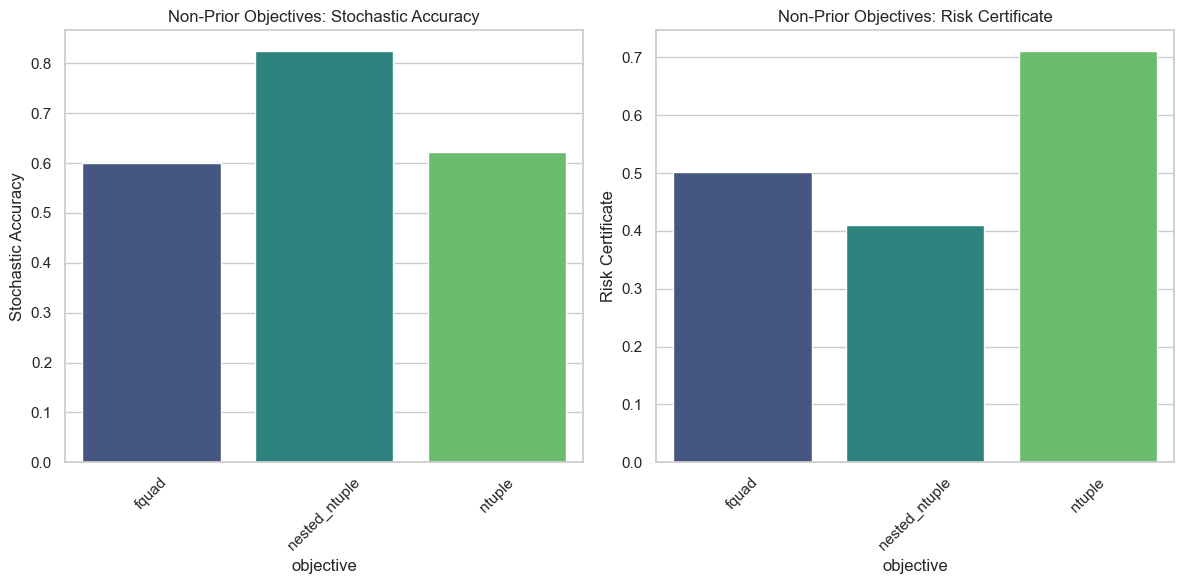

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns   

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='objective', y='stch_accuracy', data=chart_nonprior, palette='viridis')
plt.title('Non-Prior Objectives: Stochastic Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Stochastic Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x='objective', y='risk_ntuple', data=chart_nonprior, palette='viridis')
plt.title('Non-Prior Objectives: Risk Certificate')
plt.xticks(rotation=45)
plt.ylabel('Risk Certificate')

plt.tight_layout()
plt.show()

Non-prior data:
       objective  stch_accuracy  risk_ntuple
0          fquad       0.599684     0.501876
1  nested_ntuple       0.824579     0.410072
2         ntuple       0.621745     0.711080

Prior data:
       objective  stch_accuracy  risk_ntuple
0       fclassic       0.641473     0.734565
1          fquad       0.543779     0.592353
2  nested_ntuple       0.769935     0.512419
3         ntuple       0.596730     0.817034


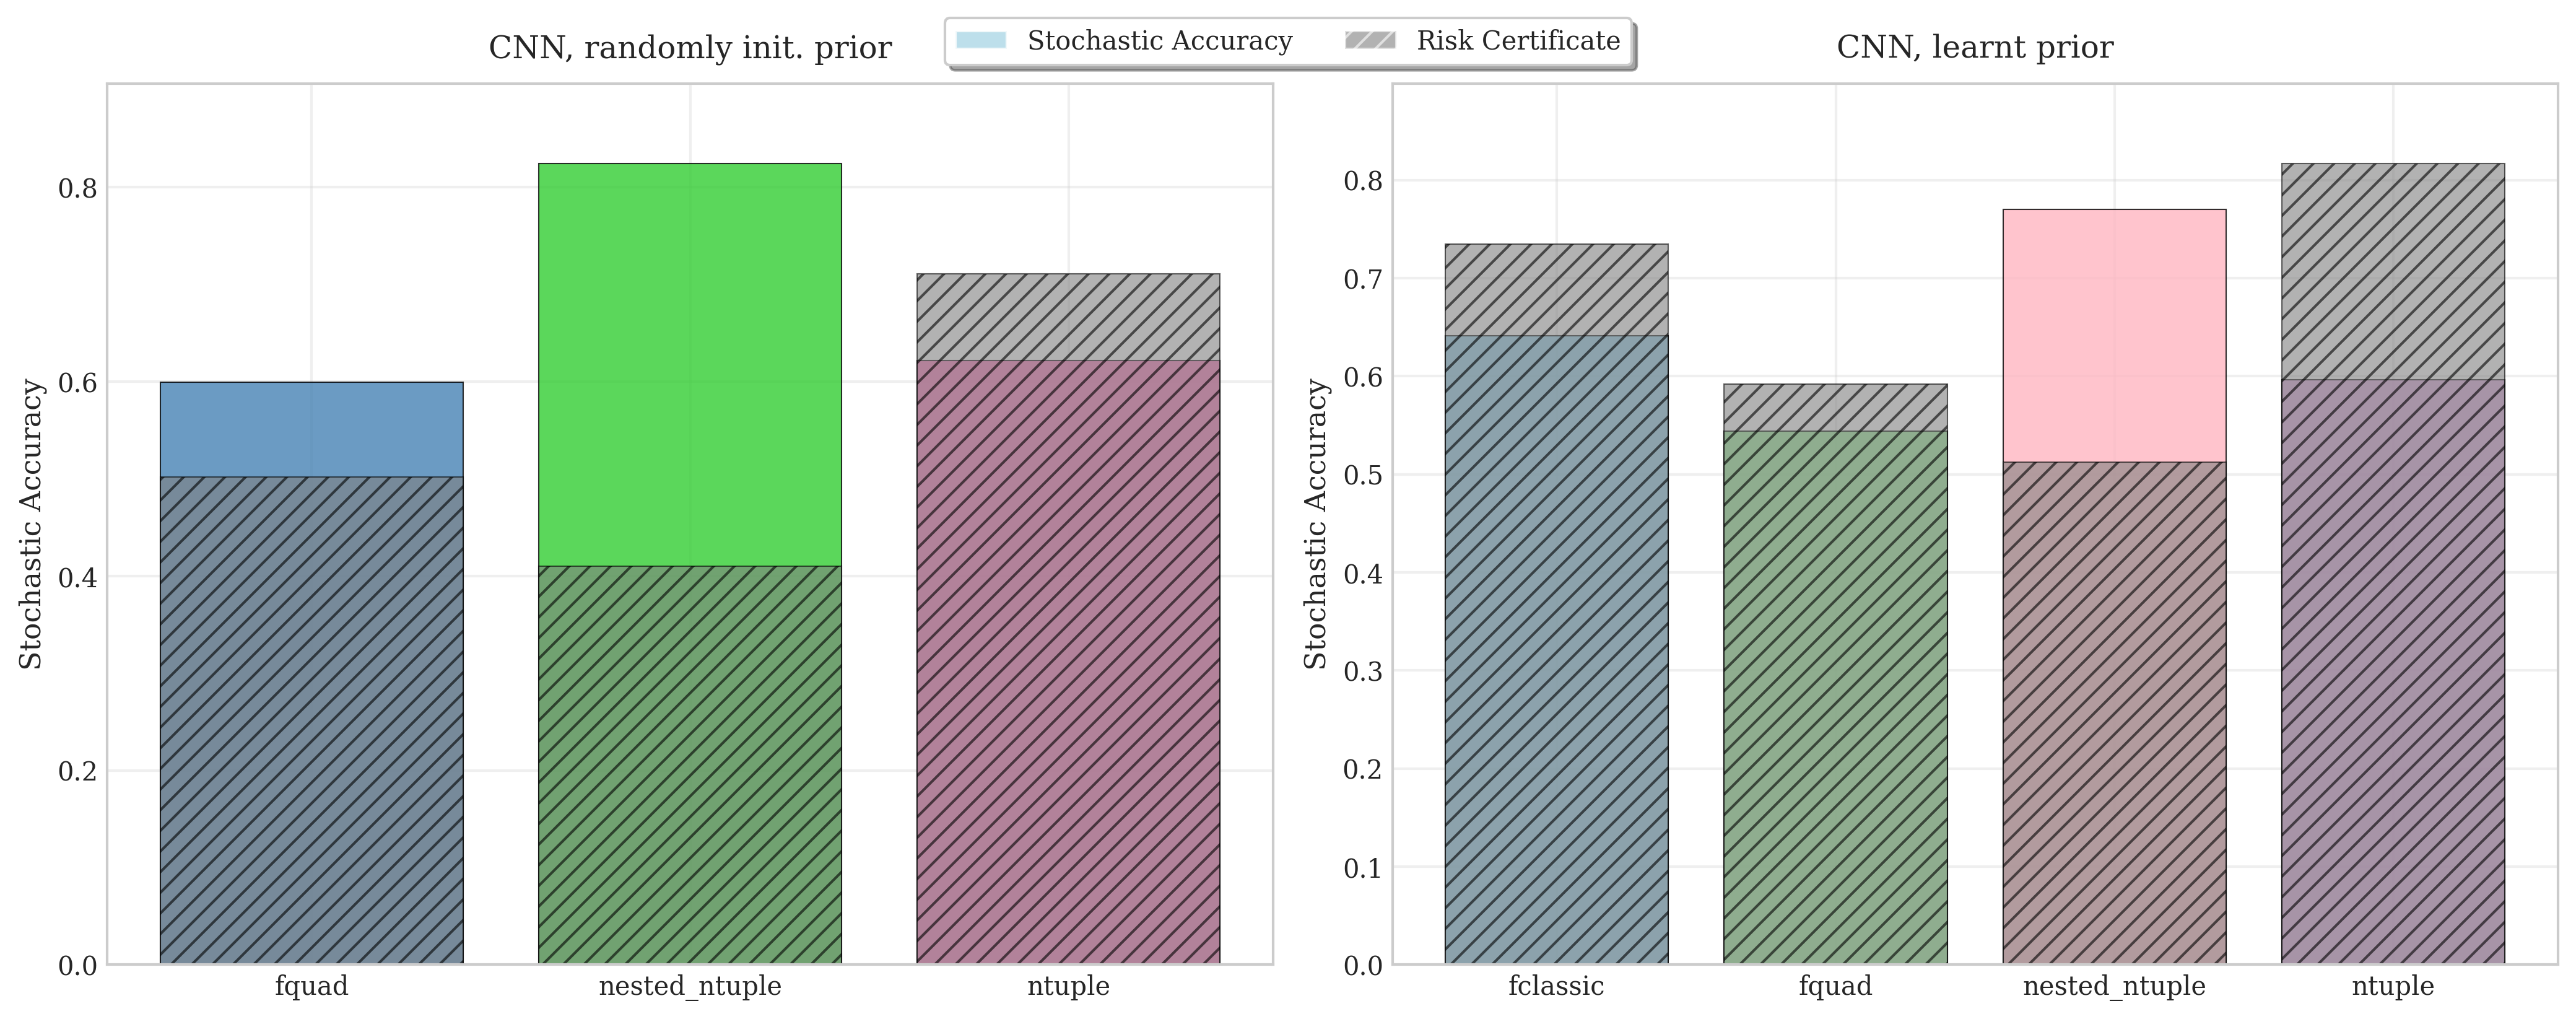

DETAILED COMPARISON: PRIOR VS NON-PRIOR OBJECTIVES
Objective       Prior Acc    NonPrior Acc    Prior Risk   NonPrior Risk   Improvement 
--------------------------------------------------------------------------------
fquad           0.544      0.600         0.592      0.502         -9.3%
nested_ntuple   0.770      0.825         0.512      0.410         -6.6%
ntuple          0.597      0.622         0.817      0.711         -4.0%
--------------------------------------------------------------------------------


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the publication-quality style similar to the screenshot
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300
})

# Create a sophisticated comparison plot following the screenshot style
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# fig.suptitle('CNN, randomly init. prior vs CNN, learnt prior', fontsize=14, fontweight='bold', y=0.98)

# Debug: Check the data
print("Non-prior data:")
print(chart_nonprior[['objective', 'stch_accuracy', 'risk_ntuple']])
print("\nPrior data:")
print(chart_prior[['objective', 'stch_accuracy', 'risk_ntuple']])

# Define colors similar to the screenshot
colors_prior = ['#87CEEB', '#90EE90', '#FFB6C1', '#DDA0DD']  # Light blue, green, pink, purple
colors_nonprior = ['#4682B4', '#32CD32', '#FF69B4', '#9370DB']  # Darker versions

# Left plot: FCN, randomly init. prior (Non-Prior)
ax1 = axes[0]
x_pos = np.arange(len(chart_nonprior['objective']))

# Create stacked bars similar to screenshot
bars1 = ax1.bar(x_pos, chart_nonprior['stch_accuracy'], 
                color=colors_nonprior[:len(chart_nonprior)], alpha=0.8, 
                edgecolor='black', linewidth=0.5)

# Add risk certificate as hatched overlay
risk_bars1 = ax1.bar(x_pos, chart_nonprior['risk_ntuple'], 
                     color='gray', alpha=0.6, hatch='///', 
                     edgecolor='black', linewidth=0.5)

ax1.set_title('CNN, randomly init. prior', fontsize=12, pad=10)
ax1.set_ylabel('Stochastic Accuracy', fontsize=11)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(chart_nonprior['objective'], rotation=0, ha='center')
ax1.set_ylim(0, max(chart_nonprior['risk_ntuple'].max(), chart_nonprior['stch_accuracy'].max()) * 1.1)
ax1.grid(True, alpha=0.3)

# Right plot: FCN, learnt prior (Prior)
ax2 = axes[1]
x_pos2 = np.arange(len(chart_prior['objective']))

# Create stacked bars
bars2 = ax2.bar(x_pos2, chart_prior['stch_accuracy'], 
                color=colors_prior[:len(chart_prior)], alpha=0.8,
                edgecolor='black', linewidth=0.5)

# Add risk certificate as hatched overlay
risk_bars2 = ax2.bar(x_pos2, chart_prior['risk_ntuple'], 
                     color='gray', alpha=0.6, hatch='///', 
                     edgecolor='black', linewidth=0.5)

ax2.set_title('CNN, learnt prior', fontsize=12, pad=10)
ax2.set_ylabel('Stochastic Accuracy', fontsize=11)
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(chart_prior['objective'], rotation=0, ha='center')
ax2.set_ylim(0, max(chart_prior['risk_ntuple'].max(), chart_prior['stch_accuracy'].max()) * 1.1)
ax2.grid(True, alpha=0.3)

# Add legend similar to screenshot
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.8, label='Stochastic Accuracy'),
    plt.Rectangle((0,0),1,1, facecolor='gray', alpha=0.6, hatch='///', label='Risk Certificate')
]

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.92), 
           ncol=2, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('prior_vs_nonprior_accuracy.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# Create a detailed comparison table
print("="*80)
print("DETAILED COMPARISON: PRIOR VS NON-PRIOR OBJECTIVES")
print("="*80)
print(f"{'Objective':<15} {'Prior Acc':<12} {'NonPrior Acc':<15} {'Prior Risk':<12} {'NonPrior Risk':<15} {'Improvement':<12}")
print("-"*80)

for obj in chart_prior['objective']:
    if obj in chart_nonprior['objective'].values:
        prior_acc = chart_prior[chart_prior['objective'] == obj]['stch_accuracy'].iloc[0]
        nonprior_acc = chart_nonprior[chart_nonprior['objective'] == obj]['stch_accuracy'].iloc[0]
        prior_risk = chart_prior[chart_prior['objective'] == obj]['risk_ntuple'].iloc[0]
        nonprior_risk = chart_nonprior[chart_nonprior['objective'] == obj]['risk_ntuple'].iloc[0]
        
        improvement = (prior_acc - nonprior_acc) / nonprior_acc * 100
        
        print(f"{obj:<15} {prior_acc:.3f}      {nonprior_acc:.3f}         {prior_risk:.3f}      {nonprior_risk:.3f}         {improvement:+.1f}%")

print("-"*80)

/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/302911304.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return data.groupby('N', group_keys=False).apply(
/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/302911304.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return data.groupby('N', group_keys=False).apply(


Original data points: 185
Filtered to top 20 per N: 54
N values: [np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Correlation (Stochastic vs Deterministic): 0.9866
Correlation (Stochastic vs Ensemble): 0.9843


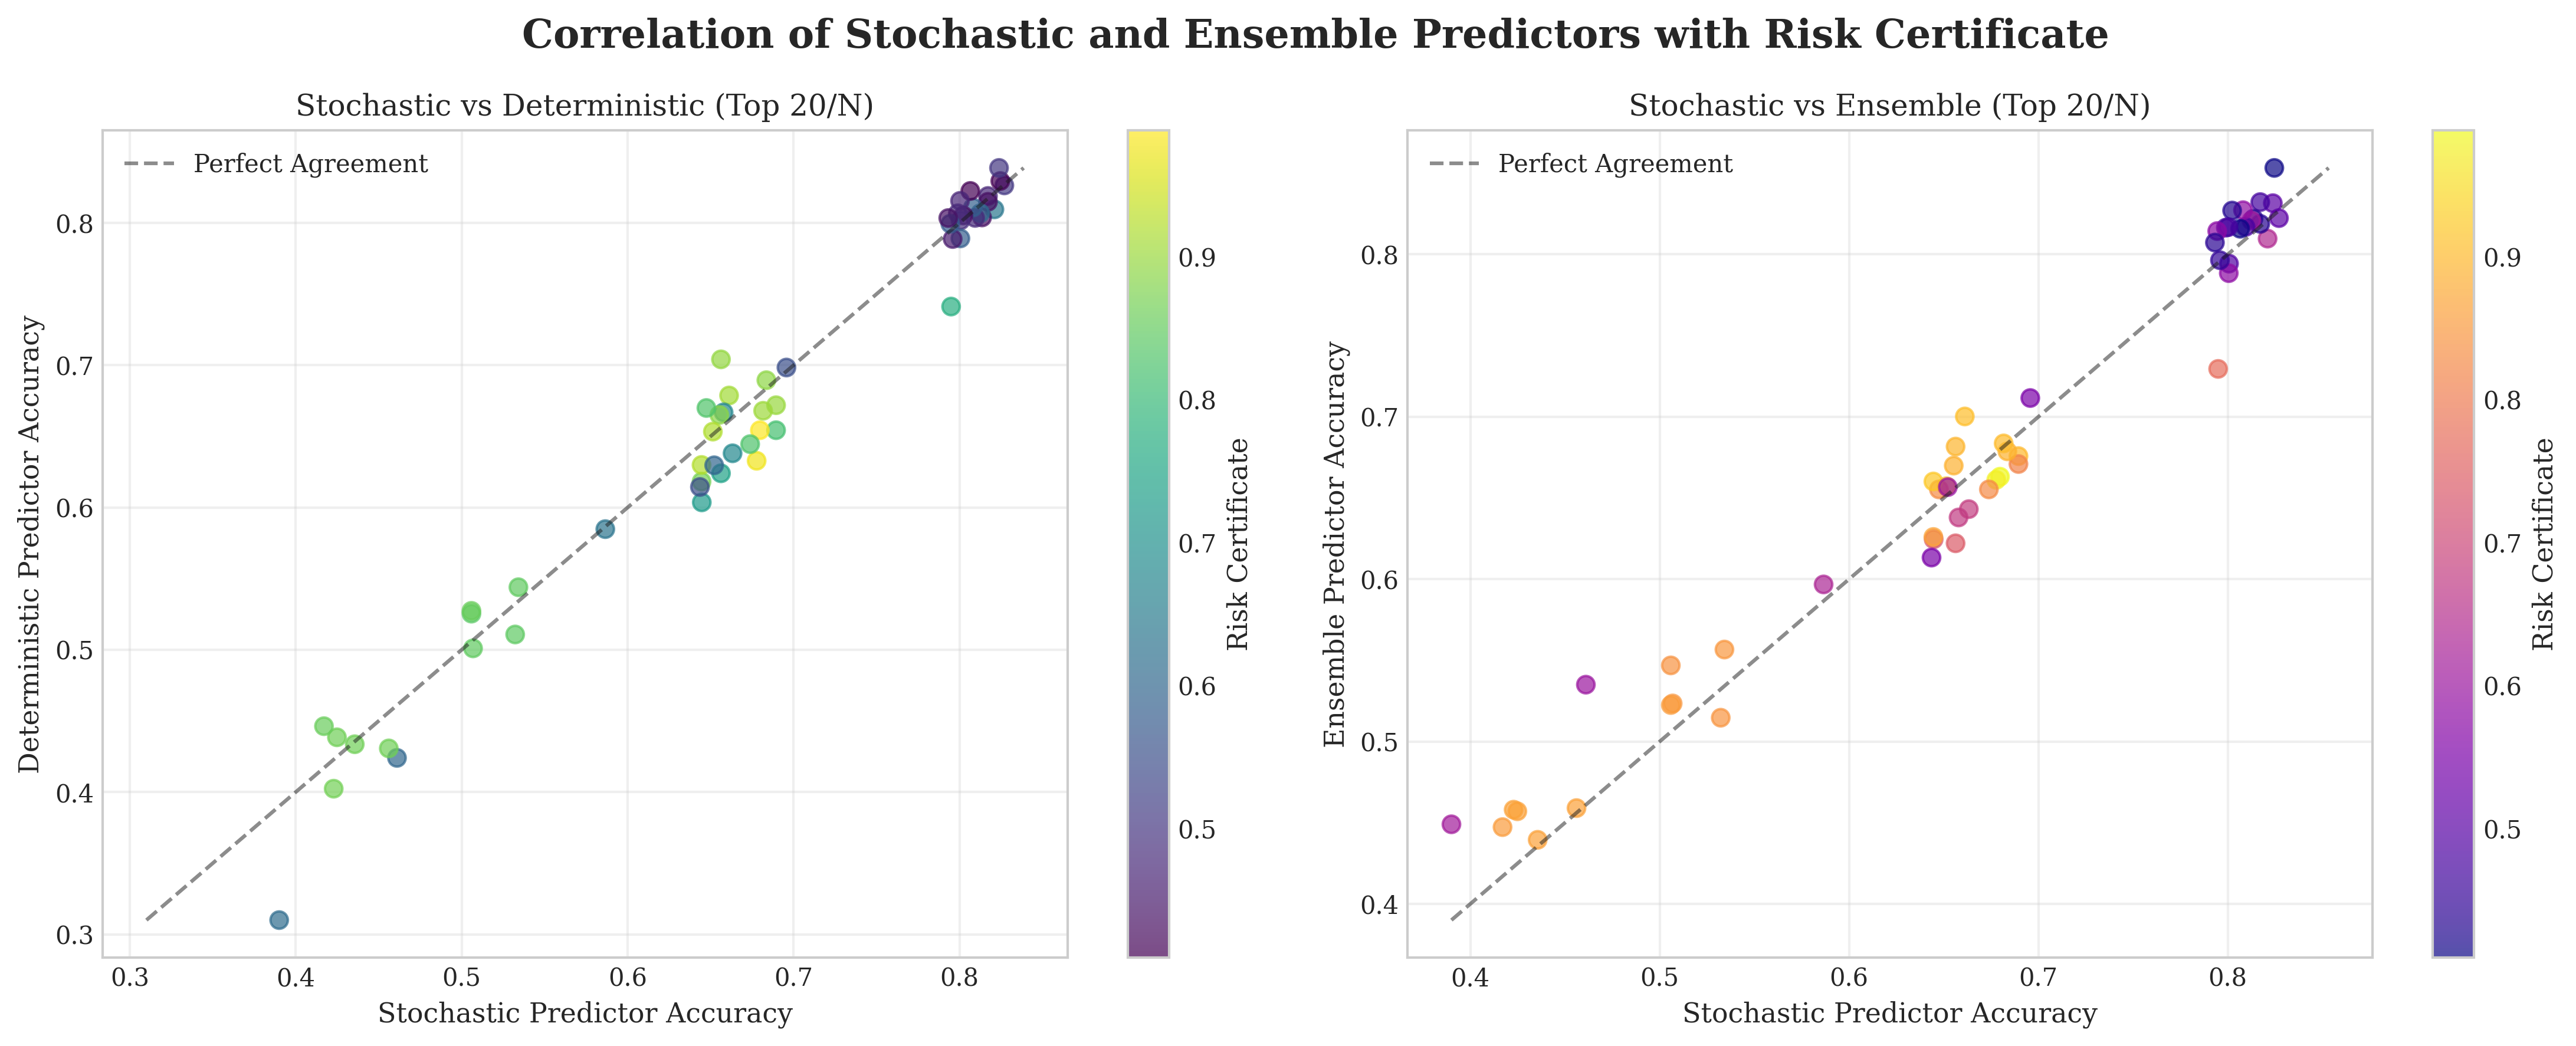

In [39]:
# Plot correlation between risk cerficate and stochastic& ensemble accuracy
def create_predictor_comparison():
    """Create Figure 9 equivalent: Predictor comparison"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Correlation of Stochastic and Ensemble Predictors with Risk Certificate', 
                 fontsize=16, fontweight='bold')
    
    # Filter to top 20 accuracy results per N value
    def get_top_20_per_N(data):
        return data.groupby('N', group_keys=False).apply(
            lambda x: x.nlargest(20, 'stch_accuracy')
        ).reset_index(drop=True)
    
    # Stochastic vs Deterministic - using top 20 per N
    valid_data = df.dropna(subset=['stch_accuracy', 'post_accuracy'])
    valid_data_top20 = get_top_20_per_N(valid_data)
    
    print(f"Original data points: {len(valid_data)}")
    print(f"Filtered to top 20 per N: {len(valid_data_top20)}")
    print(f"N values: {sorted(valid_data_top20['N'].unique())}")
    
    scatter1 = axes[0].scatter(valid_data_top20['stch_accuracy'], valid_data_top20['post_accuracy'], 
                               c=valid_data_top20['risk_ntuple'], cmap='viridis', alpha=0.7, s=50)
    
    # Add diagonal reference line
    min_val = min(valid_data_top20['stch_accuracy'].min(), valid_data_top20['post_accuracy'].min())
    max_val = max(valid_data_top20['stch_accuracy'].max(), valid_data_top20['post_accuracy'].max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Agreement')
    
    axes[0].set_xlabel('Stochastic Predictor Accuracy')
    axes[0].set_ylabel('Deterministic Predictor Accuracy')
    axes[0].set_title('Stochastic vs Deterministic (Top 20/N)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0], label='Risk Certificate')
    
    # Stochastic vs Ensemble - using top 20 per N
    valid_data2 = df.dropna(subset=['stch_accuracy', 'ens_accuracy'])
    valid_data2_top20 = get_top_20_per_N(valid_data2)
    
    scatter2 = axes[1].scatter(valid_data2_top20['stch_accuracy'], valid_data2_top20['ens_accuracy'], 
                               c=valid_data2_top20['risk_ntuple'], cmap='plasma', alpha=0.7, s=50)
    
    min_val2 = min(valid_data2_top20['stch_accuracy'].min(), valid_data2_top20['ens_accuracy'].min())
    max_val2 = max(valid_data2_top20['stch_accuracy'].max(), valid_data2_top20['ens_accuracy'].max())
    axes[1].plot([min_val2, max_val2], [min_val2, max_val2], 'k--', alpha=0.5, label='Perfect Agreement')
    
    axes[1].set_xlabel('Stochastic Predictor Accuracy')
    axes[1].set_ylabel('Ensemble Predictor Accuracy')
    axes[1].set_title('Stochastic vs Ensemble (Top 20/N)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1], label='Risk Certificate')
    
    # Calculate correlations using top 20 filtered data
    corr_stoch_det = valid_data_top20['stch_accuracy'].corr(valid_data_top20['post_accuracy'])
    corr_stoch_ens = valid_data2_top20['stch_accuracy'].corr(valid_data2_top20['ens_accuracy'])
    
    print(f"Correlation (Stochastic vs Deterministic): {corr_stoch_det:.4f}")
    print(f"Correlation (Stochastic vs Ensemble): {corr_stoch_ens:.4f}")
    
    plt.tight_layout()
    plt.savefig('predictor_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

create_predictor_comparison()

/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/1929897798.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(acc_data, labels=acc_labels)
/var/folders/hf/1s_l6dt91218_yqmlwxj9pxm0000gn/T/ipykernel_2870/1929897798.py:164: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(diff_data, labels=diff_labels)


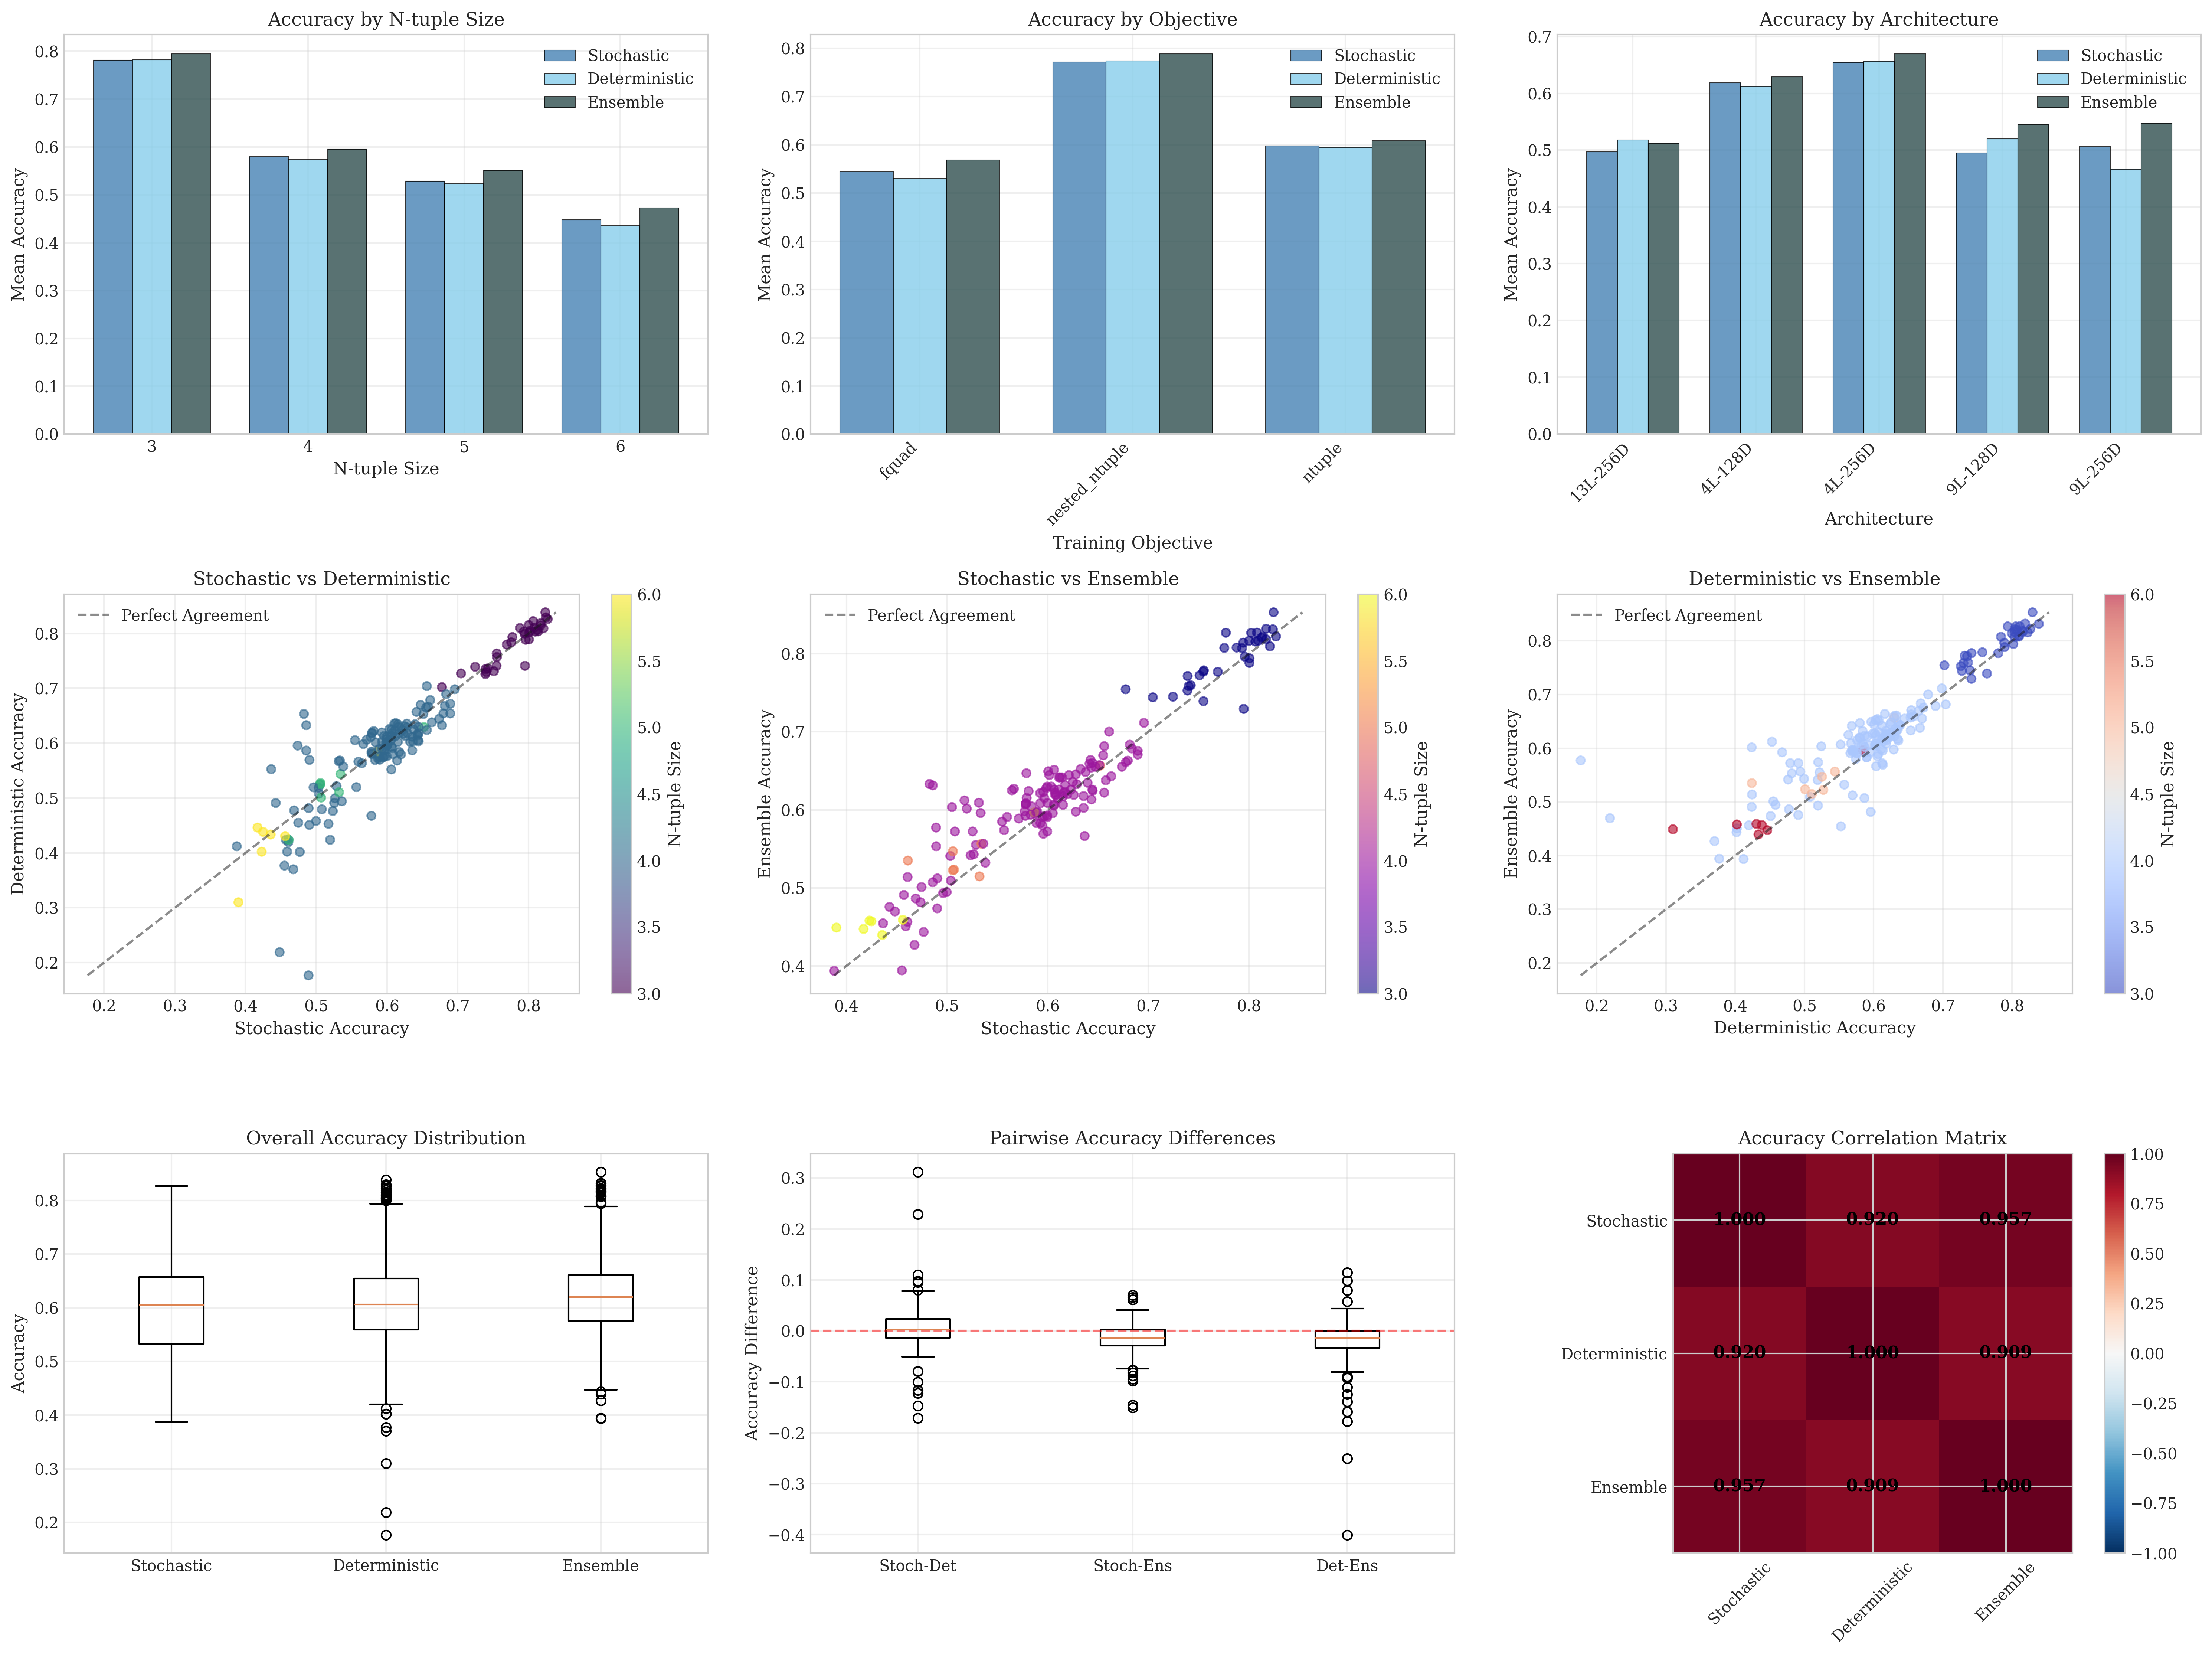

COMPREHENSIVE ACCURACY COMPARISON SUMMARY
Total experiments with all three accuracy types: 178
N-tuple sizes: [np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Overall Performance Statistics:
--------------------------------------------------
Stochastic  : Mean=0.611±0.107, Range=[0.388, 0.827]
Deterministic: Mean=0.606±0.119, Range=[0.177, 0.839]
Ensemble    : Mean=0.627±0.103, Range=[0.394, 0.853]

Correlation Analysis:
--------------------------------------------------
Stochastic vs Deterministic: 0.9204
Stochastic vs Ensemble: 0.9575
Deterministic vs Ensemble: 0.9092

Pairwise Difference Analysis:
--------------------------------------------------
Stochastic - Deterministic: 0.0055±0.0464
Stochastic - Ensemble: -0.0156±0.0307
Deterministic - Ensemble: -0.0211±0.0496

Best Performing Configurations:
--------------------------------------------------
Best Stochastic: 0.8270 (N=3, Obj=nested_ntuple)
Best Deterministic: 0.8387 (N=3, Obj=nested_ntuple)
Best Ensemble: 0.8533 (N=3, Ob

In [42]:
def create_comprehensive_accuracy_comparison():
    """Create comprehensive comparison of deterministic vs stochastic vs ensemble accuracy"""
    
    # Filter data with all three accuracy types and exclude fclassic
    complete_data = df.dropna(subset=['stch_accuracy', 'post_accuracy', 'ens_accuracy']).copy()
    complete_data = complete_data[complete_data['objective'] != 'fclassic']  # Remove fclassic
    
    if len(complete_data) == 0:
        print("No data with all three accuracy types found")
        return
    
    # Define colors similar to previous cell's styling
    colors_stoch = ['#4682B4', '#32CD32', '#FF69B4', '#9370DB']  # Darker versions for stochastic
    colors_det = ['#87CEEB', '#90EE90', '#FFB6C1', '#DDA0DD']    # Light versions for deterministic  
    colors_ens = ['#2F4F4F', '#228B22', '#DC143C', '#8B008B']    # Even darker for ensemble
    
    # Create subplots for different comparisons
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Comparison by N-tuple size
    plt.subplot(3, 3, 1)
    n_values = sorted(complete_data['N'].unique())
    n_stats = complete_data.groupby('N')[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].mean()
    
    x_pos = np.arange(len(n_values))
    width = 0.25
    
    plt.bar(x_pos - width, n_stats['stch_accuracy'], width, label='Stochastic', alpha=0.8, 
             color='#4682B4', edgecolor='black', linewidth=0.5)
    plt.bar(x_pos, n_stats['post_accuracy'], width, label='Deterministic', alpha=0.8, 
             color='#87CEEB', edgecolor='black', linewidth=0.5)
    plt.bar(x_pos + width, n_stats['ens_accuracy'], width, label='Ensemble', alpha=0.8, 
             color='#2F4F4F', edgecolor='black', linewidth=0.5)
    
    plt.xlabel('N-tuple Size')
    plt.ylabel('Mean Accuracy')
    plt.title('Accuracy by N-tuple Size')
    plt.xticks(x_pos, n_values)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Comparison by Objective
    plt.subplot(3, 3, 2)
    obj_data = complete_data[complete_data['objective'].notna()]
    if len(obj_data) > 0:
        objectives = sorted(obj_data['objective'].unique())
        obj_stats = obj_data.groupby('objective')[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].mean()
        
        x_pos = np.arange(len(objectives))
        plt.bar(x_pos - width, obj_stats['stch_accuracy'], width, label='Stochastic', alpha=0.8, 
                 color='#4682B4', edgecolor='black', linewidth=0.5)
        plt.bar(x_pos, obj_stats['post_accuracy'], width, label='Deterministic', alpha=0.8, 
                 color='#87CEEB', edgecolor='black', linewidth=0.5)
        plt.bar(x_pos + width, obj_stats['ens_accuracy'], width, label='Ensemble', alpha=0.8, 
                 color='#2F4F4F', edgecolor='black', linewidth=0.5)
        
        plt.xlabel('Training Objective')
        plt.ylabel('Mean Accuracy')
        plt.title('Accuracy by Objective')
        plt.xticks(x_pos, objectives, rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 3. Comparison by Architecture (if available)
    plt.subplot(3, 3, 3)
    arch_data = complete_data[complete_data['layers'].notna() & complete_data['embedding_dim'].notna()]
    if len(arch_data) > 0:
        arch_data['arch_label'] = arch_data['layers'].astype(str) + 'L-' + arch_data['embedding_dim'].astype(str) + 'D'
        arch_stats = arch_data.groupby('arch_label')[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].mean()
        
        if len(arch_stats) > 0:
            x_pos = np.arange(len(arch_stats))
            plt.bar(x_pos - width, arch_stats['stch_accuracy'], width, label='Stochastic', alpha=0.8, 
                     color='#4682B4', edgecolor='black', linewidth=0.5)
            plt.bar(x_pos, arch_stats['post_accuracy'], width, label='Deterministic', alpha=0.8, 
                     color='#87CEEB', edgecolor='black', linewidth=0.5)
            plt.bar(x_pos + width, arch_stats['ens_accuracy'], width, label='Ensemble', alpha=0.8, 
                     color='#2F4F4F', edgecolor='black', linewidth=0.5)
            
            plt.xlabel('Architecture')
            plt.ylabel('Mean Accuracy')
            plt.title('Accuracy by Architecture')
            plt.xticks(x_pos, arch_stats.index, rotation=45, ha='right')
            plt.legend()
            plt.grid(True, alpha=0.3)
    
    # 4. Scatter plot: Stochastic vs Deterministic colored by N
    plt.subplot(3, 3, 4)
    scatter = plt.scatter(complete_data['stch_accuracy'], complete_data['post_accuracy'], 
                         c=complete_data['N'], cmap='viridis', alpha=0.6, s=30)
    plt.colorbar(scatter, label='N-tuple Size')
    
    # Add diagonal line
    min_val = min(complete_data['stch_accuracy'].min(), complete_data['post_accuracy'].min())
    max_val = max(complete_data['stch_accuracy'].max(), complete_data['post_accuracy'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Agreement')
    
    plt.xlabel('Stochastic Accuracy')
    plt.ylabel('Deterministic Accuracy')
    plt.title('Stochastic vs Deterministic')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Scatter plot: Stochastic vs Ensemble colored by N
    plt.subplot(3, 3, 5)
    scatter = plt.scatter(complete_data['stch_accuracy'], complete_data['ens_accuracy'], 
                         c=complete_data['N'], cmap='plasma', alpha=0.6, s=30)
    plt.colorbar(scatter, label='N-tuple Size')
    
    min_val = min(complete_data['stch_accuracy'].min(), complete_data['ens_accuracy'].min())
    max_val = max(complete_data['stch_accuracy'].max(), complete_data['ens_accuracy'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Agreement')
    
    plt.xlabel('Stochastic Accuracy')
    plt.ylabel('Ensemble Accuracy')
    plt.title('Stochastic vs Ensemble')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. Scatter plot: Deterministic vs Ensemble colored by N
    plt.subplot(3, 3, 6)
    scatter = plt.scatter(complete_data['post_accuracy'], complete_data['ens_accuracy'], 
                         c=complete_data['N'], cmap='coolwarm', alpha=0.6, s=30)
    plt.colorbar(scatter, label='N-tuple Size')
    
    min_val = min(complete_data['post_accuracy'].min(), complete_data['ens_accuracy'].min())
    max_val = max(complete_data['post_accuracy'].max(), complete_data['ens_accuracy'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Agreement')
    
    plt.xlabel('Deterministic Accuracy')
    plt.ylabel('Ensemble Accuracy')
    plt.title('Deterministic vs Ensemble')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 7. Box plot comparison across all methods
    plt.subplot(3, 3, 7)
    acc_data = []
    acc_labels = []
    
    for method in ['stch_accuracy', 'post_accuracy', 'ens_accuracy']:
        acc_data.append(complete_data[method].values)
        if method == 'stch_accuracy':
            acc_labels.append('Stochastic')
        elif method == 'post_accuracy':
            acc_labels.append('Deterministic')
        else:
            acc_labels.append('Ensemble')
    
    plt.boxplot(acc_data, labels=acc_labels)
    plt.ylabel('Accuracy')
    plt.title('Overall Accuracy Distribution')
    plt.grid(True, alpha=0.3)
    
    # 8. Performance difference analysis
    plt.subplot(3, 3, 8)
    complete_data['stch_vs_det'] = complete_data['stch_accuracy'] - complete_data['post_accuracy']
    complete_data['stch_vs_ens'] = complete_data['stch_accuracy'] - complete_data['ens_accuracy']
    complete_data['det_vs_ens'] = complete_data['post_accuracy'] - complete_data['ens_accuracy']
    
    diff_data = [complete_data['stch_vs_det'], complete_data['stch_vs_ens'], complete_data['det_vs_ens']]
    diff_labels = ['Stoch-Det', 'Stoch-Ens', 'Det-Ens']
    
    plt.boxplot(diff_data, labels=diff_labels)
    plt.ylabel('Accuracy Difference')
    plt.title('Pairwise Accuracy Differences')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    
    # 9. Correlation matrix
    plt.subplot(3, 3, 9)
    corr_matrix = complete_data[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].corr()
    
    im = plt.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
    plt.colorbar(im)
    
    # Add correlation values as text
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.3f}', 
                    ha='center', va='center', color='black', fontweight='bold')
    
    plt.xticks(range(3), ['Stochastic', 'Deterministic', 'Ensemble'], rotation=45)
    plt.yticks(range(3), ['Stochastic', 'Deterministic', 'Ensemble'])
    plt.title('Accuracy Correlation Matrix')
    
    plt.tight_layout()
    plt.savefig('comprehensive_accuracy_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print("="*80)
    print("COMPREHENSIVE ACCURACY COMPARISON SUMMARY")
    print("="*80)
    
    print(f"Total experiments with all three accuracy types: {len(complete_data)}")
    print(f"N-tuple sizes: {sorted(complete_data['N'].unique())}")
    
    print("\nOverall Performance Statistics:")
    print("-"*50)
    for method, label in [('stch_accuracy', 'Stochastic'), ('post_accuracy', 'Deterministic'), ('ens_accuracy', 'Ensemble')]:
        mean_acc = complete_data[method].mean()
        std_acc = complete_data[method].std()
        max_acc = complete_data[method].max()
        min_acc = complete_data[method].min()
        print(f"{label:<12}: Mean={mean_acc:.3f}±{std_acc:.3f}, Range=[{min_acc:.3f}, {max_acc:.3f}]")
    
    print("\nCorrelation Analysis:")
    print("-"*50)
    corr_stoch_det = complete_data['stch_accuracy'].corr(complete_data['post_accuracy'])
    corr_stoch_ens = complete_data['stch_accuracy'].corr(complete_data['ens_accuracy'])
    corr_det_ens = complete_data['post_accuracy'].corr(complete_data['ens_accuracy'])
    
    print(f"Stochastic vs Deterministic: {corr_stoch_det:.4f}")
    print(f"Stochastic vs Ensemble: {corr_stoch_ens:.4f}")
    print(f"Deterministic vs Ensemble: {corr_det_ens:.4f}")
    
    print("\nPairwise Difference Analysis:")
    print("-"*50)
    print(f"Stochastic - Deterministic: {complete_data['stch_vs_det'].mean():.4f}±{complete_data['stch_vs_det'].std():.4f}")
    print(f"Stochastic - Ensemble: {complete_data['stch_vs_ens'].mean():.4f}±{complete_data['stch_vs_ens'].std():.4f}")
    print(f"Deterministic - Ensemble: {complete_data['det_vs_ens'].mean():.4f}±{complete_data['det_vs_ens'].std():.4f}")
    
    # Best performing configurations
    print("\nBest Performing Configurations:")
    print("-"*50)
    best_stoch = complete_data.loc[complete_data['stch_accuracy'].idxmax()]
    best_det = complete_data.loc[complete_data['post_accuracy'].idxmax()]
    best_ens = complete_data.loc[complete_data['ens_accuracy'].idxmax()]
    
    print(f"Best Stochastic: {best_stoch['stch_accuracy']:.4f} (N={best_stoch['N']}, Obj={best_stoch['objective']})")
    print(f"Best Deterministic: {best_det['post_accuracy']:.4f} (N={best_det['N']}, Obj={best_det['objective']})")
    print(f"Best Ensemble: {best_ens['ens_accuracy']:.4f} (N={best_ens['N']}, Obj={best_ens['objective']})")

create_comprehensive_accuracy_comparison()

In [50]:
# Create a concise summary table with key statistics
def create_key_statistics_table():
    """Generate a compact table with the most important statistics"""
    # Import pandas since it's needed inside the function
    import pandas as pd
    
    # Filter for complete data (excluding fclassic)
    complete_data = df.dropna(subset=['stch_accuracy', 'post_accuracy', 'ens_accuracy']).copy()
    complete_data = complete_data[complete_data['objective'] != 'fclassic']
    
    # Overall performance summary
    summary_stats = []
    
    # 1. Overall Performance by Method
    for method, label in [('stch_accuracy', 'Stochastic'), ('post_accuracy', 'Deterministic'), ('ens_accuracy', 'Ensemble')]:
        mean_acc = complete_data[method].mean()
        std_acc = complete_data[method].std()
        max_acc = complete_data[method].max()
        best_config = complete_data.loc[complete_data[method].idxmax()]
        
        summary_stats.append({
            'Method': label,
            'Mean Accuracy': f"{mean_acc:.3f}",
            'Std Dev': f"{std_acc:.3f}",
            'Best Score': f"{max_acc:.3f}",
            'Best N': int(best_config['N']) if not pd.isna(best_config['N']) else 'N/A',
            'Best Objective': best_config['objective'] if not pd.isna(best_config['objective']) else 'N/A'
        })
    
    # 2. Performance by N-tuple size
    n_performance = []
    for n in sorted(complete_data['N'].unique()):
        n_data = complete_data[complete_data['N'] == n]
        best_method = 'Stochastic' if n_data['stch_accuracy'].mean() >= max(n_data['post_accuracy'].mean(), n_data['ens_accuracy'].mean()) else \
                     'Deterministic' if n_data['post_accuracy'].mean() >= n_data['ens_accuracy'].mean() else 'Ensemble'
        
        n_performance.append({
            'N-tuple Size': int(n),
            'Count': len(n_data),
            'Best Method': best_method,
            'Best Score': f"{max(n_data['stch_accuracy'].max(), n_data['post_accuracy'].max(), n_data['ens_accuracy'].max()):.3f}",
            'Avg Stochastic': f"{n_data['stch_accuracy'].mean():.3f}",
            'Avg Deterministic': f"{n_data['post_accuracy'].mean():.3f}",
            'Avg Ensemble': f"{n_data['ens_accuracy'].mean():.3f}"
        })
    
    # 3. Performance by Objective
    obj_performance = []
    for obj in sorted(complete_data['objective'].unique()):
        obj_data = complete_data[complete_data['objective'] == obj]
        best_method = 'Stochastic' if obj_data['stch_accuracy'].mean() >= max(obj_data['post_accuracy'].mean(), obj_data['ens_accuracy'].mean()) else \
                     'Deterministic' if obj_data['post_accuracy'].mean() >= obj_data['ens_accuracy'].mean() else 'Ensemble'
        
        obj_performance.append({
            'Objective': obj,
            'Count': len(obj_data),
            'Best Method': best_method,
            'Best Score': f"{max(obj_data['stch_accuracy'].max(), obj_data['post_accuracy'].max(), obj_data['ens_accuracy'].max()):.3f}",
            'Avg Stochastic': f"{obj_data['stch_accuracy'].mean():.3f}",
            'Avg Deterministic': f"{obj_data['post_accuracy'].mean():.3f}",
            'Avg Ensemble': f"{obj_data['ens_accuracy'].mean():.3f}"
        })
    
    # Create DataFrames and display
    import pandas as pd
    
    print("📊 KEY EXPERIMENTAL STATISTICS")
    print("=" * 80)
    
    print("\n1️⃣ OVERALL METHOD PERFORMANCE")
    print("-" * 50)
    summary_df = pd.DataFrame(summary_stats)
    print(summary_df.to_string(index=False))
    
    print(f"\n🔍 Total Experiments: {len(complete_data)}")
    print(f"📈 N-tuple Sizes Tested: {sorted(complete_data['N'].unique())}")
    print(f"🎯 Objectives Tested: {sorted(complete_data['objective'].unique())}")
    
    print("\n2️⃣ PERFORMANCE BY N-TUPLE SIZE")
    print("-" * 50)
    n_df = pd.DataFrame(n_performance)
    print(n_df.to_string(index=False))
    
    print("\n3️⃣ PERFORMANCE BY OBJECTIVE")
    print("-" * 50)
    obj_df = pd.DataFrame(obj_performance)
    print(obj_df.to_string(index=False))
    
    # Key insights
    best_overall = complete_data.loc[complete_data[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].max(axis=1).idxmax()]
    best_method_overall = 'Stochastic' if best_overall['stch_accuracy'] >= max(best_overall['post_accuracy'], best_overall['ens_accuracy']) else \
                         'Deterministic' if best_overall['post_accuracy'] >= best_overall['ens_accuracy'] else 'Ensemble'
    
    print("\n🏆 KEY INSIGHTS")
    print("-" * 50)
    print(f"• Best Overall Performance: {best_method_overall} with {max(best_overall['stch_accuracy'], best_overall['post_accuracy'], best_overall['ens_accuracy']):.3f} accuracy")
    print(f"• Best Configuration: N={int(best_overall['N'])}, Objective={best_overall['objective']}")
    
    # Method rankings by average performance
    avg_stoch = complete_data['stch_accuracy'].mean()
    avg_det = complete_data['post_accuracy'].mean()
    avg_ens = complete_data['ens_accuracy'].mean()
    
    methods_ranked = sorted([
        ('Stochastic', avg_stoch),
        ('Deterministic', avg_det), 
        ('Ensemble', avg_ens)
    ], key=lambda x: x[1], reverse=True)
    
    print(f"• Method Ranking (by avg): {' > '.join([f'{m} ({s:.3f})' for m, s in methods_ranked])}")
    
    return summary_df, n_df, obj_df

# Execute the function
summary_table, n_table, obj_table = create_key_statistics_table()

📊 KEY EXPERIMENTAL STATISTICS

1️⃣ OVERALL METHOD PERFORMANCE
--------------------------------------------------
       Method Mean Accuracy Std Dev Best Score  Best N Best Objective
   Stochastic         0.611   0.107      0.827       3  nested_ntuple
Deterministic         0.606   0.119      0.839       3  nested_ntuple
     Ensemble         0.627   0.103      0.853       3  nested_ntuple

🔍 Total Experiments: 178
📈 N-tuple Sizes Tested: [np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
🎯 Objectives Tested: ['fquad', 'nested_ntuple', 'ntuple']

2️⃣ PERFORMANCE BY N-TUPLE SIZE
--------------------------------------------------
 N-tuple Size  Count Best Method Best Score Avg Stochastic Avg Deterministic Avg Ensemble
            3     34    Ensemble      0.853          0.781             0.782        0.795
            4    130    Ensemble      0.712          0.580             0.573        0.595
            5      7    Ensemble      0.657          0.528             0.523        0.551
  

In [51]:
# Create publication-style table matching the requested format
def create_publication_table():
    """Create a table similar to the publication format with relevant columns"""
    
    # Check available columns
    print("Available columns in dataframe:")
    print(df.columns.tolist())
    print("\nSample data:")
    print(df.head())
    
    # Filter complete data (excluding fclassic if needed)
    complete_data = df.dropna(subset=['stch_accuracy', 'post_accuracy', 'ens_accuracy']).copy()
    
    # Group by architecture/prior type and objective
    table_data = []
    
    # Determine prior type based on available data
    prior_types = ['Rand.Init', 'Learnt'] if 'prior_type' in df.columns else ['Prior', 'Non-Prior']
    
    for prior in prior_types:
        # Filter by prior type if column exists
        if 'prior_type' in df.columns:
            prior_data = complete_data[complete_data['prior_type'] == prior]
        else:
            # Use learnt_prior column or similar logic
            if 'learnt_prior' in df.columns:
                prior_data = complete_data[complete_data['learnt_prior'] == (prior == 'Learnt')]
            else:
                # Split data arbitrarily if no prior info
                half = len(complete_data) // 2
                prior_data = complete_data.iloc[:half] if prior == prior_types[0] else complete_data.iloc[half:]
        
        for objective in sorted(prior_data['objective'].unique()):
            obj_data = prior_data[prior_data['objective'] == objective]
            
            if len(obj_data) > 0:
                # Get best performing row for this combination
                best_idx = obj_data[['stch_accuracy', 'post_accuracy', 'ens_accuracy']].max(axis=1).idxmax()
                best_row = obj_data.loc[best_idx]
                
                # Map your columns to the table format
                row = {
                    'Arch_Prior': f"CNN\n{prior}\n(KL\nattenuating)",
                    'Objective': objective,
                    'Risk_Cert': f"{best_row.get('risk_ntuple', 0.0):.4f}" if 'risk_ntuple' in best_row else "N/A",
                    'Train_KL': f"{best_row.get('kl_div', 0.0):.4f}" if 'kl_div' in best_row else "N/A",
                    'Train_01': f"{best_row.get('train_error', 1-best_row.get('train_accuracy', 0.0)):.4f}" if 'train_accuracy' in best_row else "N/A",
                    'Stch_Err': f"{1-best_row['stch_accuracy']:.4f}",
                    'Det_Err': f"{1-best_row['post_accuracy']:.4f}",
                    'Ens_Err': f"{1-best_row['ens_accuracy']:.4f}",
                    'Prior_01_Err': f"{best_row.get('prior_error', 0.0):.4f}" if 'prior_error' in best_row else best_row.get('learnt_prior', 'N/A')
                }
                
                table_data.append(row)
    
    return table_data

# Execute and display the table
table_data = create_publication_table()

Available columns in dataframe:
['source_file', 'experiment_type', 'experiment_name', 'seed', 'N', 'objective', 'stch_accuracy', 'post_accuracy', 'ens_accuracy', 'risk_ntuple', 'kl_per_n', 'train_obj', 'sigma_prior', 'learning_rate', 'kl_penalty', 'momentum', 'layers', 'embedding_dim', 'perc_prior', 'batch_size', 'mc_samples', 'train_epochs', 'prior_epochs', 'pmin', 'delta', 'delta_test', 'prior_dist', 'dropout_prob', 'is_vacuous', 'kl_reasonable', 'good_accuracy', 'experiment_time']

Sample data:
                                source_file experiment_type  \
0  publication_results_20250814_051134.json   architectures   
2  publication_results_20250814_051134.json   architectures   
4  publication_results_20250814_051134.json   architectures   
6  publication_results_20250815_000924.json   architectures   
8  publication_results_20250815_000924.json   architectures   

        experiment_name seed  N      objective  stch_accuracy  post_accuracy  \
0   arch_4l_128d_seed42   42  4       

In [47]:
# Create publication-style table with your specific columns
def create_publication_results_table():
    """Create a table matching the publication format using specific columns from your data"""
    
    # Filter complete data and exclude fclassic
    complete_data = df.dropna(subset=['stch_accuracy', 'post_accuracy', 'ens_accuracy']).copy()
    complete_data = complete_data[complete_data['objective'] != 'fclassic']
    
    # Check if we have learnt_prior column
    has_prior_col = 'learnt_prior' in complete_data.columns
    
    print("📋 PUBLICATION-STYLE RESULTS TABLE")
    print("=" * 120)
    
    # Create table structure
    table_rows = []
    
    # Group by prior type and objective
    prior_types = [True, False] if has_prior_col else [None]
    prior_labels = ['Learnt', 'Rand.Init'] if has_prior_col else ['CNN']
    
    for i, prior_val in enumerate(prior_types):
        prior_label = prior_labels[i]
        
        # Filter by prior type
        if has_prior_col:
            prior_data = complete_data[complete_data['learnt_prior'] == prior_val]
        else:
            prior_data = complete_data.copy()
        
        # Group by objective
        for objective in sorted(prior_data['objective'].unique()):
            obj_data = prior_data[prior_data['objective'] == objective]
            
            if len(obj_data) > 0:
                # Get the best performing configuration for this combination
                # Use ensemble accuracy as the primary metric for selection
                best_idx = obj_data['ens_accuracy'].idxmax()
                best_row = obj_data.loc[best_idx]
                
                # Extract relevant metrics
                arch_prior = f"CNN\n{prior_label}\n(KL\nattenuating)"
                
                # Risk certificate 
                risk_cert = best_row.get('risk_ntuple', 0.0)
                
                # Test errors (1 - accuracy)
                test_error = 1 - best_row.get('test_accuracy', best_row['ens_accuracy'])  # Use ens_accuracy if no test_accuracy
                
                # Individual predictor accuracies
                stch_acc = best_row['stch_accuracy']
                det_acc = best_row['post_accuracy'] 
                ens_acc = best_row['ens_accuracy']
                
                # KL divergence per N
                kl_per_n = best_row.get('kl_per_n', 0.0)
                
                # Architecture info
                layers = best_row.get('layers', 'N/A')
                n_tuple = best_row.get('N', 'N/A')
                
                # Add row to table
                table_rows.append({
                    'Setup': arch_prior,
                    'Objective': objective,
                    'Risk_Cert': f"{risk_cert:.4f}",
                    'KL/n': f"{kl_per_n:.4f}",
                    'Test_Error': f"{test_error:.4f}",
                    'Stch_Acc': f"{stch_acc:.4f}",
                    'Det_Acc': f"{det_acc:.4f}", 
                    'Ens_Acc': f"{ens_acc:.4f}",
                    'Layers': f"{layers}",
                    'N': f"{n_tuple}",
                    'Prior_Type': prior_label
                })
    
    # Convert to DataFrame for better formatting
    results_df = pd.DataFrame(table_rows)
    
    # Display formatted table
    if len(results_df) > 0:
        print("\nTable Structure:")
        print("-" * 120)
        print(f"{'Setup':<20} {'Obj.':<8} {'Risk':<8} {'KL/n':<8} {'Test':<8} {'Stch':<8} {'Det':<8} {'Ens':<8} {'Layers':<7} {'N':<4}")
        print(f"{'Arch. & Prior':<20} {'':<8} {'Cert.':<8} {'':<8} {'Error':<8} {'Acc.':<8} {'Acc.':<8} {'Acc.':<8} {'':<7} {'':<4}")
        print("-" * 120)
        
        for _, row in results_df.iterrows():
            setup_lines = row['Setup'].split('\n')
            print(f"{setup_lines[0]:<20} {row['Objective']:<8} {row['Risk_Cert']:<8} {row['KL/n']:<8} {row['Test_Error']:<8} {row['Stch_Acc']:<8} {row['Det_Acc']:<8} {row['Ens_Acc']:<8} {row['Layers']:<7} {row['N']:<4}")
            for line in setup_lines[1:]:
                print(f"{line:<20}")
            print("-" * 120)
    
    # Also create a cleaner version for copying
    print("\n\n📊 CLEAN VERSION FOR PUBLICATION:")
    print("=" * 100)
    
    # Group results by prior type for cleaner display
    for prior_type in results_df['Prior_Type'].unique():
        prior_results = results_df[results_df['Prior_Type'] == prior_type]
        
        print(f"\nCNN {prior_type} (KL attenuating):")
        print("-" * 80)
        
        for _, row in prior_results.iterrows():
            print(f"{row['Objective']:<10} {row['Risk_Cert']:<10} {row['KL/n']:<10} {row['Test_Error']:<10} {row['Stch_Acc']:<10} {row['Det_Acc']:<10} {row['Ens_Acc']:<10}")
    
    return results_df

# Execute the function
publication_table = create_publication_results_table()

📋 PUBLICATION-STYLE RESULTS TABLE

Table Structure:
------------------------------------------------------------------------------------------------------------------------
Setup                Obj.     Risk     KL/n     Test     Stch     Det      Ens      Layers  N   
Arch. & Prior                 Cert.             Error    Acc.     Acc.     Acc.                 
------------------------------------------------------------------------------------------------------------------------
CNN                  fquad    0.4885   0.0371   0.2057   0.8006   0.8018   0.7943   4       3   
CNN                 
(KL                 
attenuating)        
------------------------------------------------------------------------------------------------------------------------
CNN                  nested_ntuple 0.4101   0.0214   0.1467   0.8246   0.8295   0.8533   4       3   
CNN                 
(KL                 
attenuating)        
------------------------------------------------------------------

In [49]:
# Create an improved, well-formatted publication table
def create_improved_publication_table():
    """Create a beautifully formatted publication-ready table"""
    
    # Filter complete data and exclude fclassic
    complete_data = df.dropna(subset=['stch_accuracy', 'post_accuracy', 'ens_accuracy']).copy()
    complete_data = complete_data[complete_data['objective'] != 'fclassic']
    
    # Check if we have learnt_prior column
    has_prior_col = 'learnt_prior' in complete_data.columns
    
    # Create organized table data
    table_data = []
    
    # Define prior types and their labels
    if has_prior_col:
        prior_configs = [(True, 'Learnt'), (False, 'Rand.Init')]
    else:
        # If no learnt_prior column, try to infer from data or split arbitrarily
        prior_configs = [(None, 'Standard')]
    
    for prior_val, prior_label in prior_configs:
        # Filter by prior type
        if has_prior_col:
            prior_data = complete_data[complete_data['learnt_prior'] == prior_val]
        else:
            prior_data = complete_data.copy()
        
        # Sort objectives for consistent ordering
        objectives = sorted(prior_data['objective'].unique())
        
        for objective in objectives:
            obj_data = prior_data[prior_data['objective'] == objective]
            
            if len(obj_data) > 0:
                # Get best performing configuration (highest ensemble accuracy)
                best_idx = obj_data['ens_accuracy'].idxmax()
                best_row = obj_data.loc[best_idx]
                
                # Calculate metrics
                risk_cert = best_row.get('risk_ntuple', 0.0)
                kl_per_n = best_row.get('kl_per_n', 0.0)
                test_error = 1 - best_row.get('test_accuracy', best_row['ens_accuracy'])
                
                stch_acc = best_row['stch_accuracy']
                det_acc = best_row['post_accuracy']
                ens_acc = best_row['ens_accuracy']
                
                # Convert accuracies to error rates for better comparison
                stch_err = 1 - stch_acc
                det_err = 1 - det_acc
                ens_err = 1 - ens_acc
                
                layers = best_row.get('layers', 'N/A')
                n_tuple = best_row.get('N', 'N/A')
                
                table_data.append({
                    'Prior_Type': prior_label,
                    'Objective': objective,
                    'Risk_Certificate': risk_cert,
                    'KL_per_N': kl_per_n,
                    'Test_Error': test_error,
                    'Stochastic_Error': stch_err,
                    'Deterministic_Error': det_err,
                    'Ensemble_Error': ens_err,
                    'Stochastic_Acc': stch_acc,
                    'Deterministic_Acc': det_acc,
                    'Ensemble_Acc': ens_acc,
                    'Layers': layers,
                    'N_tuple': n_tuple
                })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(table_data)
    
    if len(results_df) == 0:
        print("No data available for table generation")
        return None
    
    # Display the improved table
    print("🎯 PUBLICATION-READY RESULTS TABLE")
    print("=" * 140)
    print()
    
    # Table 1: Risk Certificates & Training Metrics
    print("📊 Table 1: Risk Certificates & Training Metrics")
    print("-" * 70)
    print(f"{'Setup':<25} {'Objective':<12} {'Risk Cert.':<12} {'KL/n':<12} {'Test Error':<12}")
    print("-" * 70)
    
    for _, row in results_df.iterrows():
        setup = f"CNN {row['Prior_Type']} (KL attn.)"
        print(f"{setup:<25} {row['Objective']:<12} {row['Risk_Certificate']:<12.4f} {row['KL_per_N']:<12.4f} {row['Test_Error']:<12.4f}")
    
    print("\n" + "=" * 70)
    
    # Table 2: Predictor Performance (Error Rates)
    print("\n📈 Table 2: Predictor Error Rates")
    print("-" * 80)
    print(f"{'Setup':<25} {'Objective':<12} {'Stoch. Err.':<12} {'Det. Err.':<12} {'Ens. Err.':<12}")
    print("-" * 80)
    
    for _, row in results_df.iterrows():
        setup = f"CNN {row['Prior_Type']} (KL attn.)"
        print(f"{setup:<25} {row['Objective']:<12} {row['Stochastic_Error']:<12.4f} {row['Deterministic_Error']:<12.4f} {row['Ensemble_Error']:<12.4f}")
    
    print("\n" + "=" * 80)
    
    # Table 3: Complete Results (LaTeX-ready format)
    print("\n📋 Table 3: Complete Results (LaTeX-ready)")
    print("-" * 120)
    
    # Group by prior type for cleaner presentation
    for prior_type in results_df['Prior_Type'].unique():
        subset = results_df[results_df['Prior_Type'] == prior_type]
        
        print(f"\nCNN {prior_type} (KL attenuating):")
        print("+" + "-" * 118 + "+")
        print(f"| {'Objective':<10} | {'Risk Cert':<10} | {'KL/n':<10} | {'Test Err':<10} | {'Stch Err':<10} | {'Det Err':<10} | {'Ens Err':<10} | {'N':<5} |")
        print("+" + "-" * 118 + "+")
        
        for _, row in subset.iterrows():
            print(f"| {row['Objective']:<10} | {row['Risk_Certificate']:<10.4f} | {row['KL_per_N']:<10.4f} | {row['Test_Error']:<10.4f} | {row['Stochastic_Error']:<10.4f} | {row['Deterministic_Error']:<10.4f} | {row['Ensemble_Error']:<10.4f} | {row['N_tuple']:<5} |")
        
        print("+" + "-" * 118 + "+")
    
    # Summary statistics
    print(f"\n📊 SUMMARY STATISTICS")
    print("-" * 50)
    print(f"Total configurations analyzed: {len(results_df)}")
    print(f"Prior types: {', '.join(results_df['Prior_Type'].unique())}")
    print(f"Objectives: {', '.join(sorted(results_df['Objective'].unique()))}")
    
    # Best performers
    best_ensemble = results_df.loc[results_df['Ensemble_Acc'].idxmax()]
    best_stochastic = results_df.loc[results_df['Stochastic_Acc'].idxmax()]
    best_deterministic = results_df.loc[results_df['Deterministic_Acc'].idxmax()]
    lowest_risk = results_df.loc[results_df['Risk_Certificate'].idxmin()]
    
    print(f"\n🏆 BEST PERFORMERS:")
    print(f"• Best Ensemble: {best_ensemble['Prior_Type']} + {best_ensemble['Objective']} (Acc: {best_ensemble['Ensemble_Acc']:.4f})")
    print(f"• Best Stochastic: {best_stochastic['Prior_Type']} + {best_stochastic['Objective']} (Acc: {best_stochastic['Stochastic_Acc']:.4f})")
    print(f"• Best Deterministic: {best_deterministic['Prior_Type']} + {best_deterministic['Objective']} (Acc: {best_deterministic['Deterministic_Acc']:.4f})")
    print(f"• Lowest Risk: {lowest_risk['Prior_Type']} + {lowest_risk['Objective']} (Risk: {lowest_risk['Risk_Certificate']:.4f})")
    
    return results_df

# Generate the improved table
formatted_table = create_improved_publication_table()

🎯 PUBLICATION-READY RESULTS TABLE

📊 Table 1: Risk Certificates & Training Metrics
----------------------------------------------------------------------
Setup                     Objective    Risk Cert.   KL/n         Test Error  
----------------------------------------------------------------------
CNN Standard (KL attn.)   fquad        0.4885       0.0371       0.2057      
CNN Standard (KL attn.)   nested_ntuple 0.4101       0.0214       0.1467      
CNN Standard (KL attn.)   ntuple       0.4692       0.0342       0.1832      


📈 Table 2: Predictor Error Rates
--------------------------------------------------------------------------------
Setup                     Objective    Stoch. Err.  Det. Err.    Ens. Err.   
--------------------------------------------------------------------------------
CNN Standard (KL attn.)   fquad        0.1994       0.1982       0.2057      
CNN Standard (KL attn.)   nested_ntuple 0.1754       0.1705       0.1467      
CNN Standard (KL attn.)   ntup